In [1]:
from bids import BIDSLayout
from src.pipelines.p100_pipeline import P100Pipeline
from src.utils.logger import create_logger
from src.utils.data import load_yaml

In [2]:
config = 'config.yaml'
config = load_yaml(config)
logger = create_logger('plotting')

In [3]:
visual = {
        "label": "Visual",
        "trial_type": "Stimulus",
        "tmin": -0.2,
        "tmax": 0.5,
        "trial_mode": " ",
        "trial_unit": "Words",
        "experiment_mode": "Experiment",
        "trial_boundary": "Start",
        "modality": "Pictures"
    }
    

rest = {
        "label": "Rest",
        "trial_type": "Fixation",
        "tmin": -0.2,
        "tmax": 0.5,
        "trial_mode": " ",
        "trial_unit": "Words",
        "experiment_mode": "Experiment",
        "trial_boundary": "Start",
        "modality": "",
        "time_window": (0.08, 0.12)  # Optional window for P100
    }

In [4]:
layout = BIDSLayout('BIDS', validate=True)
subject_ids = layout.get_subjects()
visual_data = []
rest_data = []

for sub in subject_ids:
    session_ids = layout.get_sessions(subject=sub)  
    for ses in session_ids:
        print(sub, ses)
        pipeline = P100Pipeline(
                    subject_id=sub,
                    session_id=ses,
                    cond_1=visual,
                    cond_2=rest,
                    channels = ['PO3', 'POz', 'PO4'], 
                    logger=logger,
                    config = config
        )
        key = f'sub-{sub}_ses-{ses}'
        pipeline.run()
        selected_channels = ['PO3', 'POz', 'PO4']
        visual_epochs =  pipeline.cond_1_epochs.copy()
        
        epochs_selected = visual_epochs.copy().pick_channels(selected_channels)
        visual_data.append(epochs_selected.get_data())
        rest_epochs =  pipeline.cond_2_epochs.copy()
        epochs_selected = rest_epochs.copy().pick_channels(selected_channels)
        rest_data.append(epochs_selected.get_data())
    

[2025-11-25 18:55:21] [INFO] ************************************************************
[2025-11-25 18:55:21] [INFO] **********P100 Pipeline sub-01, ses-01**********
[2025-11-25 18:55:21] [INFO] ************************************************************
[2025-11-25 18:55:21] [INFO] ************************************************************
[2025-11-25 18:55:21] [INFO] **********Initializing BIDSDatasetReader**********
[2025-11-25 18:55:21] [INFO] ************************************************************
[2025-11-25 18:55:21] [INFO] Processed EEG file exists. Loading...
[2025-11-25 18:55:21] [INFO] Loading processed EEG from BIDS/derivatives/low-0.1_high-40.0_ICA-True/sub-01_ses-01_processed.fif


01 01
Opening raw data file BIDS/derivatives/low-0.1_high-40.0_ICA-True/sub-01_ses-01_processed.fif...
    Range : 0 ... 6306999 =      0.000 ...  6306.999 secs
Ready.


/home/owaismujtaba/projects/mind-voice/src/dataset/data_reader.py:123: RuntimeWarning: This filename (BIDS/derivatives/low-0.1_high-40.0_ICA-True/sub-01_ses-01_processed.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  self.processed_eeg = mne.io.read_raw_fif(filepath, preload=True)


Reading 0 ... 6306999  =      0.000 ...  6306.999 secs...


[2025-11-25 18:55:23] [INFO] Creating epochs for condition: Visual


╭─────────────────────────────────────╮
│  Initializing EEGEpochBuilder Class │
╰─────────────────────────────────────╯

[2025-11-25 18:55:23] [INFO] ************************************************************
[2025-11-25 18:55:23] [INFO] **********Initializing Epoch Builder**********
[2025-11-25 18:55:23] [INFO] ************************************************************


Creating EPOCHS

[2025-11-25 18:55:23] [INFO] Creating Epochs


        Extraction Criteria        
┏━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Parameter          ┃ Value      ┃
┣━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━┫
┃ 🧪 Trial Mode      ┃            ┃
┃ 📏 Trial Unit      ┃ Words      ┃
┃ 🔗 Experiment Mode ┃ Experiment ┃
┃ 🎭 Trial Boundary  ┃ Start      ┃
┃ 🔬 Trial Type      ┃ Stimulus   ┃
┃ 📊 Modality        ┃ Pictures   ┃
┃ ⏱ Tmin             ┃ -0.2       ┃
┃ ⏳ Tmax            ┃ 0.5        ┃
┗━━━━━━━━━━━━━━━━━━━━┻━━━━━━━━━━━━┛

Not setting metadata
24 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 24 events and 701 original time points ...
0 bad epochs dropped


[2025-11-25 18:55:23] [INFO] Creating epochs for condition: Rest


╭─────────────────────────────────────╮
│  Initializing EEGEpochBuilder Class │
╰─────────────────────────────────────╯

[2025-11-25 18:55:23] [INFO] ************************************************************
[2025-11-25 18:55:23] [INFO] **********Initializing Epoch Builder**********
[2025-11-25 18:55:23] [INFO] ************************************************************


Creating EPOCHS

[2025-11-25 18:55:23] [INFO] Creating Epochs


        Extraction Criteria        
┏━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Parameter          ┃ Value      ┃
┣━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━┫
┃ 🧪 Trial Mode      ┃            ┃
┃ 📏 Trial Unit      ┃ Words      ┃
┃ 🔗 Experiment Mode ┃ Experiment ┃
┃ 🎭 Trial Boundary  ┃ Start      ┃
┃ 🔬 Trial Type      ┃ Fixation   ┃
┃ 📊 Modality        ┃            ┃
┃ ⏱ Tmin             ┃ -0.2       ┃
┃ ⏳ Tmax            ┃ 0.5        ┃
┗━━━━━━━━━━━━━━━━━━━━┻━━━━━━━━━━━━┛

Not setting metadata
72 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 72 events and 701 original time points ...
0 bad epochs dropped


[2025-11-25 18:55:23] [INFO] ************************************************************
[2025-11-25 18:55:23] [INFO] **********Initializing P100ComponentAnalyzer**********
[2025-11-25 18:55:23] [INFO] ************************************************************
[2025-11-25 18:55:23] [INFO] Caculating Latency, peak and mean
[2025-11-25 18:55:23] [INFO] Latency: 0.115, Peak: 2.531294304751412, Mean: -1.164154049105827
[2025-11-25 18:55:23] [INFO] ************************************************************
[2025-11-25 18:55:23] [INFO] **********Initializing P100ComponentAnalyzer**********
[2025-11-25 18:55:23] [INFO] ************************************************************
[2025-11-25 18:55:23] [INFO] Caculating Latency, peak and mean
[2025-11-25 18:55:23] [INFO] Latency: 0.101, Peak: 2.3357824956444624, Mean: 1.1067176107904624
[2025-11-25 18:55:23] [INFO] Saving results to CSV
[2025-11-25 18:55:23] [INFO] Results saved to /home/owaismujtaba/projects/mind-voice/results/P100/sub-01

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


[2025-11-25 18:55:23] [INFO] ************************************************************
[2025-11-25 18:55:23] [INFO] **********P100 Pipeline sub-02, ses-01**********
[2025-11-25 18:55:23] [INFO] ************************************************************
[2025-11-25 18:55:23] [INFO] ************************************************************
[2025-11-25 18:55:23] [INFO] **********Initializing BIDSDatasetReader**********
[2025-11-25 18:55:23] [INFO] ************************************************************
[2025-11-25 18:55:23] [INFO] Processed EEG file exists. Loading...
[2025-11-25 18:55:23] [INFO] Loading processed EEG from BIDS/derivatives/low-0.1_high-40.0_ICA-True/sub-02_ses-01_processed.fif


02 01
Opening raw data file BIDS/derivatives/low-0.1_high-40.0_ICA-True/sub-02_ses-01_processed.fif...
    Range : 0 ... 6465999 =      0.000 ...  6465.999 secs
Ready.


/home/owaismujtaba/projects/mind-voice/src/dataset/data_reader.py:123: RuntimeWarning: This filename (BIDS/derivatives/low-0.1_high-40.0_ICA-True/sub-02_ses-01_processed.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  self.processed_eeg = mne.io.read_raw_fif(filepath, preload=True)


Reading 0 ... 6465999  =      0.000 ...  6465.999 secs...


[2025-11-25 18:55:25] [INFO] Creating epochs for condition: Visual


╭─────────────────────────────────────╮
│  Initializing EEGEpochBuilder Class │
╰─────────────────────────────────────╯

[2025-11-25 18:55:25] [INFO] ************************************************************
[2025-11-25 18:55:25] [INFO] **********Initializing Epoch Builder**********
[2025-11-25 18:55:25] [INFO] ************************************************************


Creating EPOCHS

[2025-11-25 18:55:25] [INFO] Creating Epochs


        Extraction Criteria        
┏━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Parameter          ┃ Value      ┃
┣━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━┫
┃ 🧪 Trial Mode      ┃            ┃
┃ 📏 Trial Unit      ┃ Words      ┃
┃ 🔗 Experiment Mode ┃ Experiment ┃
┃ 🎭 Trial Boundary  ┃ Start      ┃
┃ 🔬 Trial Type      ┃ Stimulus   ┃
┃ 📊 Modality        ┃ Pictures   ┃
┃ ⏱ Tmin             ┃ -0.2       ┃
┃ ⏳ Tmax            ┃ 0.5        ┃
┗━━━━━━━━━━━━━━━━━━━━┻━━━━━━━━━━━━┛

Not setting metadata
24 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 24 events and 701 original time points ...
0 bad epochs dropped


[2025-11-25 18:55:25] [INFO] Creating epochs for condition: Rest


╭─────────────────────────────────────╮
│  Initializing EEGEpochBuilder Class │
╰─────────────────────────────────────╯

[2025-11-25 18:55:25] [INFO] ************************************************************
[2025-11-25 18:55:25] [INFO] **********Initializing Epoch Builder**********
[2025-11-25 18:55:25] [INFO] ************************************************************


Creating EPOCHS

[2025-11-25 18:55:25] [INFO] Creating Epochs


        Extraction Criteria        
┏━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Parameter          ┃ Value      ┃
┣━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━┫
┃ 🧪 Trial Mode      ┃            ┃
┃ 📏 Trial Unit      ┃ Words      ┃
┃ 🔗 Experiment Mode ┃ Experiment ┃
┃ 🎭 Trial Boundary  ┃ Start      ┃
┃ 🔬 Trial Type      ┃ Fixation   ┃
┃ 📊 Modality        ┃            ┃
┃ ⏱ Tmin             ┃ -0.2       ┃
┃ ⏳ Tmax            ┃ 0.5        ┃
┗━━━━━━━━━━━━━━━━━━━━┻━━━━━━━━━━━━┛

Not setting metadata
72 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 72 events and 701 original time points ...
0 bad epochs dropped


[2025-11-25 18:55:25] [INFO] ************************************************************
[2025-11-25 18:55:25] [INFO] **********Initializing P100ComponentAnalyzer**********
[2025-11-25 18:55:25] [INFO] ************************************************************
[2025-11-25 18:55:25] [INFO] Caculating Latency, peak and mean
[2025-11-25 18:55:25] [INFO] Latency: 0.08, Peak: 6.024609587762673, Mean: -4.06439619108711
[2025-11-25 18:55:25] [INFO] ************************************************************
[2025-11-25 18:55:25] [INFO] **********Initializing P100ComponentAnalyzer**********
[2025-11-25 18:55:25] [INFO] ************************************************************
[2025-11-25 18:55:25] [INFO] Caculating Latency, peak and mean
[2025-11-25 18:55:25] [INFO] Latency: 0.093, Peak: -0.055451657746471865, Mean: -0.8995568698696069
[2025-11-25 18:55:25] [INFO] Saving results to CSV
[2025-11-25 18:55:25] [INFO] Results saved to /home/owaismujtaba/projects/mind-voice/results/P100/sub-

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


[2025-11-25 18:55:26] [INFO] ************************************************************
[2025-11-25 18:55:26] [INFO] **********P100 Pipeline sub-03, ses-01**********
[2025-11-25 18:55:26] [INFO] ************************************************************
[2025-11-25 18:55:26] [INFO] ************************************************************
[2025-11-25 18:55:26] [INFO] **********Initializing BIDSDatasetReader**********
[2025-11-25 18:55:26] [INFO] ************************************************************
[2025-11-25 18:55:26] [INFO] Processed EEG file exists. Loading...
[2025-11-25 18:55:26] [INFO] Loading processed EEG from BIDS/derivatives/low-0.1_high-40.0_ICA-True/sub-03_ses-01_processed.fif


03 01
Opening raw data file BIDS/derivatives/low-0.1_high-40.0_ICA-True/sub-03_ses-01_processed.fif...
    Range : 0 ... 6127999 =      0.000 ...  6127.999 secs
Ready.


/home/owaismujtaba/projects/mind-voice/src/dataset/data_reader.py:123: RuntimeWarning: This filename (BIDS/derivatives/low-0.1_high-40.0_ICA-True/sub-03_ses-01_processed.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  self.processed_eeg = mne.io.read_raw_fif(filepath, preload=True)


Reading 0 ... 6127999  =      0.000 ...  6127.999 secs...


[2025-11-25 18:55:27] [INFO] Creating epochs for condition: Visual


╭─────────────────────────────────────╮
│  Initializing EEGEpochBuilder Class │
╰─────────────────────────────────────╯

[2025-11-25 18:55:27] [INFO] ************************************************************
[2025-11-25 18:55:27] [INFO] **********Initializing Epoch Builder**********
[2025-11-25 18:55:27] [INFO] ************************************************************


Creating EPOCHS

[2025-11-25 18:55:27] [INFO] Creating Epochs


        Extraction Criteria        
┏━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Parameter          ┃ Value      ┃
┣━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━┫
┃ 🧪 Trial Mode      ┃            ┃
┃ 📏 Trial Unit      ┃ Words      ┃
┃ 🔗 Experiment Mode ┃ Experiment ┃
┃ 🎭 Trial Boundary  ┃ Start      ┃
┃ 🔬 Trial Type      ┃ Stimulus   ┃
┃ 📊 Modality        ┃ Pictures   ┃
┃ ⏱ Tmin             ┃ -0.2       ┃
┃ ⏳ Tmax            ┃ 0.5        ┃
┗━━━━━━━━━━━━━━━━━━━━┻━━━━━━━━━━━━┛

Not setting metadata
24 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 24 events and 701 original time points ...
0 bad epochs dropped


[2025-11-25 18:55:27] [INFO] Creating epochs for condition: Rest


╭─────────────────────────────────────╮
│  Initializing EEGEpochBuilder Class │
╰─────────────────────────────────────╯

[2025-11-25 18:55:27] [INFO] ************************************************************
[2025-11-25 18:55:27] [INFO] **********Initializing Epoch Builder**********
[2025-11-25 18:55:27] [INFO] ************************************************************


Creating EPOCHS

[2025-11-25 18:55:27] [INFO] Creating Epochs


        Extraction Criteria        
┏━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Parameter          ┃ Value      ┃
┣━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━┫
┃ 🧪 Trial Mode      ┃            ┃
┃ 📏 Trial Unit      ┃ Words      ┃
┃ 🔗 Experiment Mode ┃ Experiment ┃
┃ 🎭 Trial Boundary  ┃ Start      ┃
┃ 🔬 Trial Type      ┃ Fixation   ┃
┃ 📊 Modality        ┃            ┃
┃ ⏱ Tmin             ┃ -0.2       ┃
┃ ⏳ Tmax            ┃ 0.5        ┃
┗━━━━━━━━━━━━━━━━━━━━┻━━━━━━━━━━━━┛

Not setting metadata
72 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 72 events and 701 original time points ...
0 bad epochs dropped


[2025-11-25 18:55:27] [INFO] ************************************************************
[2025-11-25 18:55:27] [INFO] **********Initializing P100ComponentAnalyzer**********
[2025-11-25 18:55:27] [INFO] ************************************************************
[2025-11-25 18:55:27] [INFO] Caculating Latency, peak and mean
[2025-11-25 18:55:27] [INFO] Latency: 0.113, Peak: 12.850054694625706, Mean: 6.848387499972537
[2025-11-25 18:55:27] [INFO] ************************************************************
[2025-11-25 18:55:27] [INFO] **********Initializing P100ComponentAnalyzer**********
[2025-11-25 18:55:27] [INFO] ************************************************************
[2025-11-25 18:55:27] [INFO] Caculating Latency, peak and mean
[2025-11-25 18:55:27] [INFO] Latency: 0.093, Peak: 2.066615119144706, Mean: 0.7005360089040549
[2025-11-25 18:55:27] [INFO] Saving results to CSV
[2025-11-25 18:55:27] [INFO] Results saved to /home/owaismujtaba/projects/mind-voice/results/P100/sub-03_

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


[2025-11-25 18:55:28] [INFO] ************************************************************
[2025-11-25 18:55:28] [INFO] **********P100 Pipeline sub-04, ses-01**********
[2025-11-25 18:55:28] [INFO] ************************************************************
[2025-11-25 18:55:28] [INFO] ************************************************************
[2025-11-25 18:55:28] [INFO] **********Initializing BIDSDatasetReader**********
[2025-11-25 18:55:28] [INFO] ************************************************************
[2025-11-25 18:55:28] [INFO] Processed EEG file exists. Loading...
[2025-11-25 18:55:28] [INFO] Loading processed EEG from BIDS/derivatives/low-0.1_high-40.0_ICA-True/sub-04_ses-01_processed.fif


04 01
Opening raw data file BIDS/derivatives/low-0.1_high-40.0_ICA-True/sub-04_ses-01_processed.fif...
    Range : 0 ... 7078999 =      0.000 ...  7078.999 secs
Ready.


/home/owaismujtaba/projects/mind-voice/src/dataset/data_reader.py:123: RuntimeWarning: This filename (BIDS/derivatives/low-0.1_high-40.0_ICA-True/sub-04_ses-01_processed.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  self.processed_eeg = mne.io.read_raw_fif(filepath, preload=True)


Reading 0 ... 7078999  =      0.000 ...  7078.999 secs...


[2025-11-25 18:55:29] [INFO] Creating epochs for condition: Visual


╭─────────────────────────────────────╮
│  Initializing EEGEpochBuilder Class │
╰─────────────────────────────────────╯

[2025-11-25 18:55:29] [INFO] ************************************************************
[2025-11-25 18:55:29] [INFO] **********Initializing Epoch Builder**********
[2025-11-25 18:55:29] [INFO] ************************************************************


Creating EPOCHS

[2025-11-25 18:55:29] [INFO] Creating Epochs


        Extraction Criteria        
┏━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Parameter          ┃ Value      ┃
┣━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━┫
┃ 🧪 Trial Mode      ┃            ┃
┃ 📏 Trial Unit      ┃ Words      ┃
┃ 🔗 Experiment Mode ┃ Experiment ┃
┃ 🎭 Trial Boundary  ┃ Start      ┃
┃ 🔬 Trial Type      ┃ Stimulus   ┃
┃ 📊 Modality        ┃ Pictures   ┃
┃ ⏱ Tmin             ┃ -0.2       ┃
┃ ⏳ Tmax            ┃ 0.5        ┃
┗━━━━━━━━━━━━━━━━━━━━┻━━━━━━━━━━━━┛

Not setting metadata
24 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 24 events and 701 original time points ...
0 bad epochs dropped


[2025-11-25 18:55:29] [INFO] Creating epochs for condition: Rest


╭─────────────────────────────────────╮
│  Initializing EEGEpochBuilder Class │
╰─────────────────────────────────────╯

[2025-11-25 18:55:29] [INFO] ************************************************************
[2025-11-25 18:55:29] [INFO] **********Initializing Epoch Builder**********
[2025-11-25 18:55:29] [INFO] ************************************************************


Creating EPOCHS

[2025-11-25 18:55:29] [INFO] Creating Epochs


        Extraction Criteria        
┏━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Parameter          ┃ Value      ┃
┣━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━┫
┃ 🧪 Trial Mode      ┃            ┃
┃ 📏 Trial Unit      ┃ Words      ┃
┃ 🔗 Experiment Mode ┃ Experiment ┃
┃ 🎭 Trial Boundary  ┃ Start      ┃
┃ 🔬 Trial Type      ┃ Fixation   ┃
┃ 📊 Modality        ┃            ┃
┃ ⏱ Tmin             ┃ -0.2       ┃
┃ ⏳ Tmax            ┃ 0.5        ┃
┗━━━━━━━━━━━━━━━━━━━━┻━━━━━━━━━━━━┛

Not setting metadata
72 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 72 events and 701 original time points ...
0 bad epochs dropped


[2025-11-25 18:55:29] [INFO] ************************************************************
[2025-11-25 18:55:29] [INFO] **********Initializing P100ComponentAnalyzer**********
[2025-11-25 18:55:29] [INFO] ************************************************************
[2025-11-25 18:55:29] [INFO] Caculating Latency, peak and mean
[2025-11-25 18:55:29] [INFO] Latency: 0.12, Peak: -5.927282174257012, Mean: -7.354372249513795
[2025-11-25 18:55:29] [INFO] ************************************************************
[2025-11-25 18:55:29] [INFO] **********Initializing P100ComponentAnalyzer**********
[2025-11-25 18:55:29] [INFO] ************************************************************
[2025-11-25 18:55:30] [INFO] Caculating Latency, peak and mean
[2025-11-25 18:55:30] [INFO] Latency: 0.12, Peak: -0.34564139831946883, Mean: -2.7044116871781685
[2025-11-25 18:55:30] [INFO] Saving results to CSV
[2025-11-25 18:55:30] [INFO] Results saved to /home/owaismujtaba/projects/mind-voice/results/P100/sub-

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


[2025-11-25 18:55:30] [INFO] ************************************************************
[2025-11-25 18:55:30] [INFO] **********P100 Pipeline sub-04, ses-02**********
[2025-11-25 18:55:30] [INFO] ************************************************************
[2025-11-25 18:55:30] [INFO] ************************************************************
[2025-11-25 18:55:30] [INFO] **********Initializing BIDSDatasetReader**********
[2025-11-25 18:55:30] [INFO] ************************************************************
[2025-11-25 18:55:30] [INFO] Processed EEG file exists. Loading...
[2025-11-25 18:55:30] [INFO] Loading processed EEG from BIDS/derivatives/low-0.1_high-40.0_ICA-True/sub-04_ses-02_processed.fif


04 02
Opening raw data file BIDS/derivatives/low-0.1_high-40.0_ICA-True/sub-04_ses-02_processed.fif...
    Range : 0 ... 6420999 =      0.000 ...  6420.999 secs
Ready.


/home/owaismujtaba/projects/mind-voice/src/dataset/data_reader.py:123: RuntimeWarning: This filename (BIDS/derivatives/low-0.1_high-40.0_ICA-True/sub-04_ses-02_processed.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  self.processed_eeg = mne.io.read_raw_fif(filepath, preload=True)


Reading 0 ... 6420999  =      0.000 ...  6420.999 secs...


[2025-11-25 18:55:31] [INFO] Creating epochs for condition: Visual


╭─────────────────────────────────────╮
│  Initializing EEGEpochBuilder Class │
╰─────────────────────────────────────╯

[2025-11-25 18:55:31] [INFO] ************************************************************
[2025-11-25 18:55:31] [INFO] **********Initializing Epoch Builder**********
[2025-11-25 18:55:31] [INFO] ************************************************************


Creating EPOCHS

[2025-11-25 18:55:31] [INFO] Creating Epochs


        Extraction Criteria        
┏━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Parameter          ┃ Value      ┃
┣━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━┫
┃ 🧪 Trial Mode      ┃            ┃
┃ 📏 Trial Unit      ┃ Words      ┃
┃ 🔗 Experiment Mode ┃ Experiment ┃
┃ 🎭 Trial Boundary  ┃ Start      ┃
┃ 🔬 Trial Type      ┃ Stimulus   ┃
┃ 📊 Modality        ┃ Pictures   ┃
┃ ⏱ Tmin             ┃ -0.2       ┃
┃ ⏳ Tmax            ┃ 0.5        ┃
┗━━━━━━━━━━━━━━━━━━━━┻━━━━━━━━━━━━┛

Not setting metadata
24 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 24 events and 701 original time points ...
0 bad epochs dropped


[2025-11-25 18:55:31] [INFO] Creating epochs for condition: Rest


╭─────────────────────────────────────╮
│  Initializing EEGEpochBuilder Class │
╰─────────────────────────────────────╯

[2025-11-25 18:55:31] [INFO] ************************************************************
[2025-11-25 18:55:31] [INFO] **********Initializing Epoch Builder**********
[2025-11-25 18:55:31] [INFO] ************************************************************


Creating EPOCHS

[2025-11-25 18:55:31] [INFO] Creating Epochs


        Extraction Criteria        
┏━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Parameter          ┃ Value      ┃
┣━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━┫
┃ 🧪 Trial Mode      ┃            ┃
┃ 📏 Trial Unit      ┃ Words      ┃
┃ 🔗 Experiment Mode ┃ Experiment ┃
┃ 🎭 Trial Boundary  ┃ Start      ┃
┃ 🔬 Trial Type      ┃ Fixation   ┃
┃ 📊 Modality        ┃            ┃
┃ ⏱ Tmin             ┃ -0.2       ┃
┃ ⏳ Tmax            ┃ 0.5        ┃
┗━━━━━━━━━━━━━━━━━━━━┻━━━━━━━━━━━━┛

Not setting metadata
72 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 72 events and 701 original time points ...
0 bad epochs dropped


[2025-11-25 18:55:31] [INFO] ************************************************************
[2025-11-25 18:55:31] [INFO] **********Initializing P100ComponentAnalyzer**********
[2025-11-25 18:55:31] [INFO] ************************************************************
[2025-11-25 18:55:32] [INFO] Caculating Latency, peak and mean
[2025-11-25 18:55:32] [INFO] Latency: 0.12, Peak: 4.0204994914864916, Mean: 1.8952488934573475
[2025-11-25 18:55:32] [INFO] ************************************************************
[2025-11-25 18:55:32] [INFO] **********Initializing P100ComponentAnalyzer**********
[2025-11-25 18:55:32] [INFO] ************************************************************
[2025-11-25 18:55:32] [INFO] Caculating Latency, peak and mean
[2025-11-25 18:55:32] [INFO] Latency: 0.12, Peak: 0.3308341786519292, Mean: -0.838392649930575
[2025-11-25 18:55:32] [INFO] Saving results to CSV
[2025-11-25 18:55:32] [INFO] Results saved to /home/owaismujtaba/projects/mind-voice/results/P100/sub-04_

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


[2025-11-25 18:55:32] [INFO] ************************************************************
[2025-11-25 18:55:32] [INFO] **********P100 Pipeline sub-05, ses-01**********
[2025-11-25 18:55:32] [INFO] ************************************************************
[2025-11-25 18:55:32] [INFO] ************************************************************
[2025-11-25 18:55:32] [INFO] **********Initializing BIDSDatasetReader**********
[2025-11-25 18:55:32] [INFO] ************************************************************
[2025-11-25 18:55:32] [INFO] Processed EEG file exists. Loading...
[2025-11-25 18:55:32] [INFO] Loading processed EEG from BIDS/derivatives/low-0.1_high-40.0_ICA-True/sub-05_ses-01_processed.fif


05 01
Opening raw data file BIDS/derivatives/low-0.1_high-40.0_ICA-True/sub-05_ses-01_processed.fif...
    Range : 0 ... 5886999 =      0.000 ...  5886.999 secs
Ready.


/home/owaismujtaba/projects/mind-voice/src/dataset/data_reader.py:123: RuntimeWarning: This filename (BIDS/derivatives/low-0.1_high-40.0_ICA-True/sub-05_ses-01_processed.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  self.processed_eeg = mne.io.read_raw_fif(filepath, preload=True)


Reading 0 ... 5886999  =      0.000 ...  5886.999 secs...


[2025-11-25 18:55:33] [INFO] Creating epochs for condition: Visual


╭─────────────────────────────────────╮
│  Initializing EEGEpochBuilder Class │
╰─────────────────────────────────────╯

[2025-11-25 18:55:33] [INFO] ************************************************************
[2025-11-25 18:55:33] [INFO] **********Initializing Epoch Builder**********
[2025-11-25 18:55:33] [INFO] ************************************************************


Creating EPOCHS

[2025-11-25 18:55:33] [INFO] Creating Epochs


        Extraction Criteria        
┏━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Parameter          ┃ Value      ┃
┣━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━┫
┃ 🧪 Trial Mode      ┃            ┃
┃ 📏 Trial Unit      ┃ Words      ┃
┃ 🔗 Experiment Mode ┃ Experiment ┃
┃ 🎭 Trial Boundary  ┃ Start      ┃
┃ 🔬 Trial Type      ┃ Stimulus   ┃
┃ 📊 Modality        ┃ Pictures   ┃
┃ ⏱ Tmin             ┃ -0.2       ┃
┃ ⏳ Tmax            ┃ 0.5        ┃
┗━━━━━━━━━━━━━━━━━━━━┻━━━━━━━━━━━━┛

Not setting metadata
24 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 24 events and 701 original time points ...
0 bad epochs dropped


[2025-11-25 18:55:33] [INFO] Creating epochs for condition: Rest


╭─────────────────────────────────────╮
│  Initializing EEGEpochBuilder Class │
╰─────────────────────────────────────╯

[2025-11-25 18:55:33] [INFO] ************************************************************
[2025-11-25 18:55:33] [INFO] **********Initializing Epoch Builder**********
[2025-11-25 18:55:33] [INFO] ************************************************************


Creating EPOCHS

[2025-11-25 18:55:33] [INFO] Creating Epochs


        Extraction Criteria        
┏━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Parameter          ┃ Value      ┃
┣━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━┫
┃ 🧪 Trial Mode      ┃            ┃
┃ 📏 Trial Unit      ┃ Words      ┃
┃ 🔗 Experiment Mode ┃ Experiment ┃
┃ 🎭 Trial Boundary  ┃ Start      ┃
┃ 🔬 Trial Type      ┃ Fixation   ┃
┃ 📊 Modality        ┃            ┃
┃ ⏱ Tmin             ┃ -0.2       ┃
┃ ⏳ Tmax            ┃ 0.5        ┃
┗━━━━━━━━━━━━━━━━━━━━┻━━━━━━━━━━━━┛

Not setting metadata
72 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 72 events and 701 original time points ...
0 bad epochs dropped


[2025-11-25 18:55:34] [INFO] ************************************************************
[2025-11-25 18:55:34] [INFO] **********Initializing P100ComponentAnalyzer**********
[2025-11-25 18:55:34] [INFO] ************************************************************
[2025-11-25 18:55:34] [INFO] Caculating Latency, peak and mean
[2025-11-25 18:55:34] [INFO] Latency: 0.12, Peak: -1.0164858683825075, Mean: -2.77680240343324
[2025-11-25 18:55:34] [INFO] ************************************************************
[2025-11-25 18:55:34] [INFO] **********Initializing P100ComponentAnalyzer**********
[2025-11-25 18:55:34] [INFO] ************************************************************
[2025-11-25 18:55:34] [INFO] Caculating Latency, peak and mean
[2025-11-25 18:55:34] [INFO] Latency: 0.093, Peak: 1.5351293346460464, Mean: 0.9701829723113715
[2025-11-25 18:55:34] [INFO] Saving results to CSV
[2025-11-25 18:55:34] [INFO] Results saved to /home/owaismujtaba/projects/mind-voice/results/P100/sub-05

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


[2025-11-25 18:55:34] [INFO] ************************************************************
[2025-11-25 18:55:34] [INFO] **********P100 Pipeline sub-05, ses-02**********
[2025-11-25 18:55:34] [INFO] ************************************************************
[2025-11-25 18:55:34] [INFO] ************************************************************
[2025-11-25 18:55:34] [INFO] **********Initializing BIDSDatasetReader**********
[2025-11-25 18:55:34] [INFO] ************************************************************
[2025-11-25 18:55:34] [INFO] Processed EEG file exists. Loading...
[2025-11-25 18:55:34] [INFO] Loading processed EEG from BIDS/derivatives/low-0.1_high-40.0_ICA-True/sub-05_ses-02_processed.fif


05 02
Opening raw data file BIDS/derivatives/low-0.1_high-40.0_ICA-True/sub-05_ses-02_processed.fif...
    Range : 0 ... 5732999 =      0.000 ...  5732.999 secs
Ready.
Reading 0 ... 5732999  =      0.000 ...  5732.999 secs...


/home/owaismujtaba/projects/mind-voice/src/dataset/data_reader.py:123: RuntimeWarning: This filename (BIDS/derivatives/low-0.1_high-40.0_ICA-True/sub-05_ses-02_processed.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  self.processed_eeg = mne.io.read_raw_fif(filepath, preload=True)
[2025-11-25 18:55:35] [INFO] Creating epochs for condition: Visual


╭─────────────────────────────────────╮
│  Initializing EEGEpochBuilder Class │
╰─────────────────────────────────────╯

[2025-11-25 18:55:35] [INFO] ************************************************************
[2025-11-25 18:55:35] [INFO] **********Initializing Epoch Builder**********
[2025-11-25 18:55:35] [INFO] ************************************************************


Creating EPOCHS

[2025-11-25 18:55:35] [INFO] Creating Epochs


        Extraction Criteria        
┏━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Parameter          ┃ Value      ┃
┣━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━┫
┃ 🧪 Trial Mode      ┃            ┃
┃ 📏 Trial Unit      ┃ Words      ┃
┃ 🔗 Experiment Mode ┃ Experiment ┃
┃ 🎭 Trial Boundary  ┃ Start      ┃
┃ 🔬 Trial Type      ┃ Stimulus   ┃
┃ 📊 Modality        ┃ Pictures   ┃
┃ ⏱ Tmin             ┃ -0.2       ┃
┃ ⏳ Tmax            ┃ 0.5        ┃
┗━━━━━━━━━━━━━━━━━━━━┻━━━━━━━━━━━━┛

Not setting metadata
24 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 24 events and 701 original time points ...
0 bad epochs dropped


[2025-11-25 18:55:35] [INFO] Creating epochs for condition: Rest


╭─────────────────────────────────────╮
│  Initializing EEGEpochBuilder Class │
╰─────────────────────────────────────╯

[2025-11-25 18:55:35] [INFO] ************************************************************
[2025-11-25 18:55:35] [INFO] **********Initializing Epoch Builder**********
[2025-11-25 18:55:35] [INFO] ************************************************************


Creating EPOCHS

[2025-11-25 18:55:35] [INFO] Creating Epochs


        Extraction Criteria        
┏━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Parameter          ┃ Value      ┃
┣━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━┫
┃ 🧪 Trial Mode      ┃            ┃
┃ 📏 Trial Unit      ┃ Words      ┃
┃ 🔗 Experiment Mode ┃ Experiment ┃
┃ 🎭 Trial Boundary  ┃ Start      ┃
┃ 🔬 Trial Type      ┃ Fixation   ┃
┃ 📊 Modality        ┃            ┃
┃ ⏱ Tmin             ┃ -0.2       ┃
┃ ⏳ Tmax            ┃ 0.5        ┃
┗━━━━━━━━━━━━━━━━━━━━┻━━━━━━━━━━━━┛

Not setting metadata
72 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 72 events and 701 original time points ...
0 bad epochs dropped


[2025-11-25 18:55:35] [INFO] ************************************************************
[2025-11-25 18:55:35] [INFO] **********Initializing P100ComponentAnalyzer**********
[2025-11-25 18:55:35] [INFO] ************************************************************
[2025-11-25 18:55:36] [INFO] Caculating Latency, peak and mean
[2025-11-25 18:55:36] [INFO] Latency: 0.091, Peak: 128.2262430826482, Mean: 98.35406403126773
[2025-11-25 18:55:36] [INFO] ************************************************************
[2025-11-25 18:55:36] [INFO] **********Initializing P100ComponentAnalyzer**********
[2025-11-25 18:55:36] [INFO] ************************************************************
[2025-11-25 18:55:36] [INFO] Caculating Latency, peak and mean
[2025-11-25 18:55:36] [INFO] Latency: 0.12, Peak: -55.494306594412365, Mean: -91.3988844481614
[2025-11-25 18:55:36] [INFO] Saving results to CSV
[2025-11-25 18:55:36] [INFO] Results saved to /home/owaismujtaba/projects/mind-voice/results/P100/sub-05_s

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


[2025-11-25 18:55:36] [INFO] ************************************************************
[2025-11-25 18:55:36] [INFO] **********P100 Pipeline sub-06, ses-01**********
[2025-11-25 18:55:36] [INFO] ************************************************************
[2025-11-25 18:55:36] [INFO] ************************************************************
[2025-11-25 18:55:36] [INFO] **********Initializing BIDSDatasetReader**********
[2025-11-25 18:55:36] [INFO] ************************************************************
[2025-11-25 18:55:36] [INFO] Processed EEG file exists. Loading...
[2025-11-25 18:55:36] [INFO] Loading processed EEG from BIDS/derivatives/low-0.1_high-40.0_ICA-True/sub-06_ses-01_processed.fif


06 01
Opening raw data file BIDS/derivatives/low-0.1_high-40.0_ICA-True/sub-06_ses-01_processed.fif...
    Range : 0 ... 6603999 =      0.000 ...  6603.999 secs
Ready.


/home/owaismujtaba/projects/mind-voice/src/dataset/data_reader.py:123: RuntimeWarning: This filename (BIDS/derivatives/low-0.1_high-40.0_ICA-True/sub-06_ses-01_processed.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  self.processed_eeg = mne.io.read_raw_fif(filepath, preload=True)


Reading 0 ... 6603999  =      0.000 ...  6603.999 secs...


[2025-11-25 18:55:37] [INFO] Creating epochs for condition: Visual


╭─────────────────────────────────────╮
│  Initializing EEGEpochBuilder Class │
╰─────────────────────────────────────╯

[2025-11-25 18:55:37] [INFO] ************************************************************
[2025-11-25 18:55:37] [INFO] **********Initializing Epoch Builder**********
[2025-11-25 18:55:37] [INFO] ************************************************************


Creating EPOCHS

[2025-11-25 18:55:37] [INFO] Creating Epochs


        Extraction Criteria        
┏━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Parameter          ┃ Value      ┃
┣━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━┫
┃ 🧪 Trial Mode      ┃            ┃
┃ 📏 Trial Unit      ┃ Words      ┃
┃ 🔗 Experiment Mode ┃ Experiment ┃
┃ 🎭 Trial Boundary  ┃ Start      ┃
┃ 🔬 Trial Type      ┃ Stimulus   ┃
┃ 📊 Modality        ┃ Pictures   ┃
┃ ⏱ Tmin             ┃ -0.2       ┃
┃ ⏳ Tmax            ┃ 0.5        ┃
┗━━━━━━━━━━━━━━━━━━━━┻━━━━━━━━━━━━┛

Not setting metadata
24 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 24 events and 701 original time points ...
0 bad epochs dropped


[2025-11-25 18:55:38] [INFO] Creating epochs for condition: Rest


╭─────────────────────────────────────╮
│  Initializing EEGEpochBuilder Class │
╰─────────────────────────────────────╯

[2025-11-25 18:55:38] [INFO] ************************************************************
[2025-11-25 18:55:38] [INFO] **********Initializing Epoch Builder**********
[2025-11-25 18:55:38] [INFO] ************************************************************


Creating EPOCHS

[2025-11-25 18:55:38] [INFO] Creating Epochs


        Extraction Criteria        
┏━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Parameter          ┃ Value      ┃
┣━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━┫
┃ 🧪 Trial Mode      ┃            ┃
┃ 📏 Trial Unit      ┃ Words      ┃
┃ 🔗 Experiment Mode ┃ Experiment ┃
┃ 🎭 Trial Boundary  ┃ Start      ┃
┃ 🔬 Trial Type      ┃ Fixation   ┃
┃ 📊 Modality        ┃            ┃
┃ ⏱ Tmin             ┃ -0.2       ┃
┃ ⏳ Tmax            ┃ 0.5        ┃
┗━━━━━━━━━━━━━━━━━━━━┻━━━━━━━━━━━━┛

Not setting metadata
72 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 72 events and 701 original time points ...
0 bad epochs dropped


[2025-11-25 18:55:38] [INFO] ************************************************************
[2025-11-25 18:55:38] [INFO] **********Initializing P100ComponentAnalyzer**********
[2025-11-25 18:55:38] [INFO] ************************************************************
[2025-11-25 18:55:38] [INFO] Caculating Latency, peak and mean
[2025-11-25 18:55:38] [INFO] Latency: 0.12, Peak: 5.745294041295215, Mean: 1.53519435668207
[2025-11-25 18:55:38] [INFO] ************************************************************
[2025-11-25 18:55:38] [INFO] **********Initializing P100ComponentAnalyzer**********
[2025-11-25 18:55:38] [INFO] ************************************************************
[2025-11-25 18:55:38] [INFO] Caculating Latency, peak and mean
[2025-11-25 18:55:38] [INFO] Latency: 0.08, Peak: -0.6724434316280498, Mean: -3.6546634838307854
[2025-11-25 18:55:38] [INFO] Saving results to CSV
[2025-11-25 18:55:38] [INFO] Results saved to /home/owaismujtaba/projects/mind-voice/results/P100/sub-06_s

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


[2025-11-25 18:55:38] [INFO] ************************************************************
[2025-11-25 18:55:38] [INFO] **********P100 Pipeline sub-06, ses-02**********
[2025-11-25 18:55:38] [INFO] ************************************************************
[2025-11-25 18:55:38] [INFO] ************************************************************
[2025-11-25 18:55:38] [INFO] **********Initializing BIDSDatasetReader**********
[2025-11-25 18:55:38] [INFO] ************************************************************
[2025-11-25 18:55:38] [INFO] Processed EEG file exists. Loading...
[2025-11-25 18:55:38] [INFO] Loading processed EEG from BIDS/derivatives/low-0.1_high-40.0_ICA-True/sub-06_ses-02_processed.fif


06 02
Opening raw data file BIDS/derivatives/low-0.1_high-40.0_ICA-True/sub-06_ses-02_processed.fif...
    Range : 0 ... 6025999 =      0.000 ...  6025.999 secs
Ready.
Reading 0 ... 6025999  =      0.000 ...  6025.999 secs...


/home/owaismujtaba/projects/mind-voice/src/dataset/data_reader.py:123: RuntimeWarning: This filename (BIDS/derivatives/low-0.1_high-40.0_ICA-True/sub-06_ses-02_processed.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  self.processed_eeg = mne.io.read_raw_fif(filepath, preload=True)
[2025-11-25 18:55:39] [INFO] Creating epochs for condition: Visual


╭─────────────────────────────────────╮
│  Initializing EEGEpochBuilder Class │
╰─────────────────────────────────────╯

[2025-11-25 18:55:39] [INFO] ************************************************************
[2025-11-25 18:55:39] [INFO] **********Initializing Epoch Builder**********
[2025-11-25 18:55:39] [INFO] ************************************************************


Creating EPOCHS

[2025-11-25 18:55:39] [INFO] Creating Epochs


        Extraction Criteria        
┏━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Parameter          ┃ Value      ┃
┣━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━┫
┃ 🧪 Trial Mode      ┃            ┃
┃ 📏 Trial Unit      ┃ Words      ┃
┃ 🔗 Experiment Mode ┃ Experiment ┃
┃ 🎭 Trial Boundary  ┃ Start      ┃
┃ 🔬 Trial Type      ┃ Stimulus   ┃
┃ 📊 Modality        ┃ Pictures   ┃
┃ ⏱ Tmin             ┃ -0.2       ┃
┃ ⏳ Tmax            ┃ 0.5        ┃
┗━━━━━━━━━━━━━━━━━━━━┻━━━━━━━━━━━━┛

Not setting metadata
24 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 24 events and 701 original time points ...
0 bad epochs dropped


[2025-11-25 18:55:40] [INFO] Creating epochs for condition: Rest


╭─────────────────────────────────────╮
│  Initializing EEGEpochBuilder Class │
╰─────────────────────────────────────╯

[2025-11-25 18:55:40] [INFO] ************************************************************
[2025-11-25 18:55:40] [INFO] **********Initializing Epoch Builder**********
[2025-11-25 18:55:40] [INFO] ************************************************************


Creating EPOCHS

[2025-11-25 18:55:40] [INFO] Creating Epochs


        Extraction Criteria        
┏━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Parameter          ┃ Value      ┃
┣━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━┫
┃ 🧪 Trial Mode      ┃            ┃
┃ 📏 Trial Unit      ┃ Words      ┃
┃ 🔗 Experiment Mode ┃ Experiment ┃
┃ 🎭 Trial Boundary  ┃ Start      ┃
┃ 🔬 Trial Type      ┃ Fixation   ┃
┃ 📊 Modality        ┃            ┃
┃ ⏱ Tmin             ┃ -0.2       ┃
┃ ⏳ Tmax            ┃ 0.5        ┃
┗━━━━━━━━━━━━━━━━━━━━┻━━━━━━━━━━━━┛

Not setting metadata
72 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 72 events and 701 original time points ...
0 bad epochs dropped


[2025-11-25 18:55:40] [INFO] ************************************************************
[2025-11-25 18:55:40] [INFO] **********Initializing P100ComponentAnalyzer**********
[2025-11-25 18:55:40] [INFO] ************************************************************
[2025-11-25 18:55:40] [INFO] Caculating Latency, peak and mean
[2025-11-25 18:55:40] [INFO] Latency: 0.12, Peak: 12.593592757739687, Mean: 4.062223603435783
[2025-11-25 18:55:40] [INFO] ************************************************************
[2025-11-25 18:55:40] [INFO] **********Initializing P100ComponentAnalyzer**********
[2025-11-25 18:55:40] [INFO] ************************************************************
[2025-11-25 18:55:40] [INFO] Caculating Latency, peak and mean
[2025-11-25 18:55:40] [INFO] Latency: 0.09, Peak: -0.02760025902443236, Mean: -1.5069343259077221
[2025-11-25 18:55:40] [INFO] Saving results to CSV
[2025-11-25 18:55:40] [INFO] Results saved to /home/owaismujtaba/projects/mind-voice/results/P100/sub-0

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


[2025-11-25 18:55:40] [INFO] ************************************************************
[2025-11-25 18:55:40] [INFO] **********P100 Pipeline sub-07, ses-01**********
[2025-11-25 18:55:40] [INFO] ************************************************************
[2025-11-25 18:55:40] [INFO] ************************************************************
[2025-11-25 18:55:40] [INFO] **********Initializing BIDSDatasetReader**********
[2025-11-25 18:55:40] [INFO] ************************************************************
[2025-11-25 18:55:40] [INFO] Processed EEG file exists. Loading...
[2025-11-25 18:55:40] [INFO] Loading processed EEG from BIDS/derivatives/low-0.1_high-40.0_ICA-True/sub-07_ses-01_processed.fif


07 01
Opening raw data file BIDS/derivatives/low-0.1_high-40.0_ICA-True/sub-07_ses-01_processed.fif...
    Range : 0 ... 5999999 =      0.000 ...  5999.999 secs


/home/owaismujtaba/projects/mind-voice/src/dataset/data_reader.py:123: RuntimeWarning: This filename (BIDS/derivatives/low-0.1_high-40.0_ICA-True/sub-07_ses-01_processed.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  self.processed_eeg = mne.io.read_raw_fif(filepath, preload=True)


Ready.
Reading 0 ... 5999999  =      0.000 ...  5999.999 secs...


[2025-11-25 18:55:41] [INFO] Creating epochs for condition: Visual


╭─────────────────────────────────────╮
│  Initializing EEGEpochBuilder Class │
╰─────────────────────────────────────╯

[2025-11-25 18:55:41] [INFO] ************************************************************
[2025-11-25 18:55:41] [INFO] **********Initializing Epoch Builder**********
[2025-11-25 18:55:41] [INFO] ************************************************************


Creating EPOCHS

[2025-11-25 18:55:41] [INFO] Creating Epochs


        Extraction Criteria        
┏━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Parameter          ┃ Value      ┃
┣━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━┫
┃ 🧪 Trial Mode      ┃            ┃
┃ 📏 Trial Unit      ┃ Words      ┃
┃ 🔗 Experiment Mode ┃ Experiment ┃
┃ 🎭 Trial Boundary  ┃ Start      ┃
┃ 🔬 Trial Type      ┃ Stimulus   ┃
┃ 📊 Modality        ┃ Pictures   ┃
┃ ⏱ Tmin             ┃ -0.2       ┃
┃ ⏳ Tmax            ┃ 0.5        ┃
┗━━━━━━━━━━━━━━━━━━━━┻━━━━━━━━━━━━┛

Not setting metadata
24 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 24 events and 701 original time points ...
0 bad epochs dropped


[2025-11-25 18:55:42] [INFO] Creating epochs for condition: Rest


╭─────────────────────────────────────╮
│  Initializing EEGEpochBuilder Class │
╰─────────────────────────────────────╯

[2025-11-25 18:55:42] [INFO] ************************************************************
[2025-11-25 18:55:42] [INFO] **********Initializing Epoch Builder**********
[2025-11-25 18:55:42] [INFO] ************************************************************


Creating EPOCHS

[2025-11-25 18:55:42] [INFO] Creating Epochs


        Extraction Criteria        
┏━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Parameter          ┃ Value      ┃
┣━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━┫
┃ 🧪 Trial Mode      ┃            ┃
┃ 📏 Trial Unit      ┃ Words      ┃
┃ 🔗 Experiment Mode ┃ Experiment ┃
┃ 🎭 Trial Boundary  ┃ Start      ┃
┃ 🔬 Trial Type      ┃ Fixation   ┃
┃ 📊 Modality        ┃            ┃
┃ ⏱ Tmin             ┃ -0.2       ┃
┃ ⏳ Tmax            ┃ 0.5        ┃
┗━━━━━━━━━━━━━━━━━━━━┻━━━━━━━━━━━━┛

Not setting metadata
72 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 72 events and 701 original time points ...
0 bad epochs dropped


[2025-11-25 18:55:42] [INFO] ************************************************************
[2025-11-25 18:55:42] [INFO] **********Initializing P100ComponentAnalyzer**********
[2025-11-25 18:55:42] [INFO] ************************************************************
[2025-11-25 18:55:42] [INFO] Caculating Latency, peak and mean
[2025-11-25 18:55:42] [INFO] Latency: 0.092, Peak: 53.02632318970055, Mean: 29.76080777396747
[2025-11-25 18:55:42] [INFO] ************************************************************
[2025-11-25 18:55:42] [INFO] **********Initializing P100ComponentAnalyzer**********
[2025-11-25 18:55:42] [INFO] ************************************************************
[2025-11-25 18:55:42] [INFO] Caculating Latency, peak and mean
[2025-11-25 18:55:42] [INFO] Latency: 0.103, Peak: -0.38384187191318364, Mean: -13.879652733607772
[2025-11-25 18:55:42] [INFO] Saving results to CSV
[2025-11-25 18:55:42] [INFO] Results saved to /home/owaismujtaba/projects/mind-voice/results/P100/sub-

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


[2025-11-25 18:55:42] [INFO] ************************************************************
[2025-11-25 18:55:42] [INFO] **********P100 Pipeline sub-08, ses-01**********
[2025-11-25 18:55:42] [INFO] ************************************************************
[2025-11-25 18:55:42] [INFO] ************************************************************
[2025-11-25 18:55:42] [INFO] **********Initializing BIDSDatasetReader**********
[2025-11-25 18:55:42] [INFO] ************************************************************
[2025-11-25 18:55:42] [INFO] Processed EEG file exists. Loading...
[2025-11-25 18:55:42] [INFO] Loading processed EEG from BIDS/derivatives/low-0.1_high-40.0_ICA-True/sub-08_ses-01_processed.fif


08 01
Opening raw data file BIDS/derivatives/low-0.1_high-40.0_ICA-True/sub-08_ses-01_processed.fif...


/home/owaismujtaba/projects/mind-voice/src/dataset/data_reader.py:123: RuntimeWarning: This filename (BIDS/derivatives/low-0.1_high-40.0_ICA-True/sub-08_ses-01_processed.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  self.processed_eeg = mne.io.read_raw_fif(filepath, preload=True)


    Range : 0 ... 5847999 =      0.000 ...  5847.999 secs
Ready.
Reading 0 ... 5847999  =      0.000 ...  5847.999 secs...


[2025-11-25 18:55:43] [INFO] Creating epochs for condition: Visual


╭─────────────────────────────────────╮
│  Initializing EEGEpochBuilder Class │
╰─────────────────────────────────────╯

[2025-11-25 18:55:43] [INFO] ************************************************************
[2025-11-25 18:55:43] [INFO] **********Initializing Epoch Builder**********
[2025-11-25 18:55:43] [INFO] ************************************************************


Creating EPOCHS

[2025-11-25 18:55:43] [INFO] Creating Epochs


        Extraction Criteria        
┏━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Parameter          ┃ Value      ┃
┣━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━┫
┃ 🧪 Trial Mode      ┃            ┃
┃ 📏 Trial Unit      ┃ Words      ┃
┃ 🔗 Experiment Mode ┃ Experiment ┃
┃ 🎭 Trial Boundary  ┃ Start      ┃
┃ 🔬 Trial Type      ┃ Stimulus   ┃
┃ 📊 Modality        ┃ Pictures   ┃
┃ ⏱ Tmin             ┃ -0.2       ┃
┃ ⏳ Tmax            ┃ 0.5        ┃
┗━━━━━━━━━━━━━━━━━━━━┻━━━━━━━━━━━━┛

Not setting metadata
24 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 24 events and 701 original time points ...
0 bad epochs dropped


[2025-11-25 18:55:44] [INFO] Creating epochs for condition: Rest


╭─────────────────────────────────────╮
│  Initializing EEGEpochBuilder Class │
╰─────────────────────────────────────╯

[2025-11-25 18:55:44] [INFO] ************************************************************
[2025-11-25 18:55:44] [INFO] **********Initializing Epoch Builder**********
[2025-11-25 18:55:44] [INFO] ************************************************************


Creating EPOCHS

[2025-11-25 18:55:44] [INFO] Creating Epochs


        Extraction Criteria        
┏━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Parameter          ┃ Value      ┃
┣━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━┫
┃ 🧪 Trial Mode      ┃            ┃
┃ 📏 Trial Unit      ┃ Words      ┃
┃ 🔗 Experiment Mode ┃ Experiment ┃
┃ 🎭 Trial Boundary  ┃ Start      ┃
┃ 🔬 Trial Type      ┃ Fixation   ┃
┃ 📊 Modality        ┃            ┃
┃ ⏱ Tmin             ┃ -0.2       ┃
┃ ⏳ Tmax            ┃ 0.5        ┃
┗━━━━━━━━━━━━━━━━━━━━┻━━━━━━━━━━━━┛

Not setting metadata
72 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 72 events and 701 original time points ...
0 bad epochs dropped


[2025-11-25 18:55:44] [INFO] ************************************************************
[2025-11-25 18:55:44] [INFO] **********Initializing P100ComponentAnalyzer**********
[2025-11-25 18:55:44] [INFO] ************************************************************
[2025-11-25 18:55:44] [INFO] Caculating Latency, peak and mean
[2025-11-25 18:55:44] [INFO] Latency: 0.12, Peak: 13.133797843919535, Mean: 6.803140207655021
[2025-11-25 18:55:44] [INFO] ************************************************************
[2025-11-25 18:55:44] [INFO] **********Initializing P100ComponentAnalyzer**********
[2025-11-25 18:55:44] [INFO] ************************************************************
[2025-11-25 18:55:44] [INFO] Caculating Latency, peak and mean
[2025-11-25 18:55:44] [INFO] Latency: 0.12, Peak: 0.9592856938193067, Mean: -0.7243481656004679
[2025-11-25 18:55:44] [INFO] Saving results to CSV
[2025-11-25 18:55:44] [INFO] Results saved to /home/owaismujtaba/projects/mind-voice/results/P100/sub-08_

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


[2025-11-25 18:55:44] [INFO] ************************************************************
[2025-11-25 18:55:44] [INFO] **********P100 Pipeline sub-09, ses-01**********
[2025-11-25 18:55:44] [INFO] ************************************************************
[2025-11-25 18:55:44] [INFO] ************************************************************
[2025-11-25 18:55:44] [INFO] **********Initializing BIDSDatasetReader**********
[2025-11-25 18:55:44] [INFO] ************************************************************
[2025-11-25 18:55:44] [INFO] Processed EEG file exists. Loading...
[2025-11-25 18:55:44] [INFO] Loading processed EEG from BIDS/derivatives/low-0.1_high-40.0_ICA-True/sub-09_ses-01_processed.fif


09 01
Opening raw data file BIDS/derivatives/low-0.1_high-40.0_ICA-True/sub-09_ses-01_processed.fif...


/home/owaismujtaba/projects/mind-voice/src/dataset/data_reader.py:123: RuntimeWarning: This filename (BIDS/derivatives/low-0.1_high-40.0_ICA-True/sub-09_ses-01_processed.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  self.processed_eeg = mne.io.read_raw_fif(filepath, preload=True)


    Range : 0 ... 6227999 =      0.000 ...  6227.999 secs
Ready.
Reading 0 ... 6227999  =      0.000 ...  6227.999 secs...


[2025-11-25 18:55:46] [INFO] Creating epochs for condition: Visual


╭─────────────────────────────────────╮
│  Initializing EEGEpochBuilder Class │
╰─────────────────────────────────────╯

[2025-11-25 18:55:46] [INFO] ************************************************************
[2025-11-25 18:55:46] [INFO] **********Initializing Epoch Builder**********
[2025-11-25 18:55:46] [INFO] ************************************************************


Creating EPOCHS

[2025-11-25 18:55:46] [INFO] Creating Epochs


        Extraction Criteria        
┏━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Parameter          ┃ Value      ┃
┣━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━┫
┃ 🧪 Trial Mode      ┃            ┃
┃ 📏 Trial Unit      ┃ Words      ┃
┃ 🔗 Experiment Mode ┃ Experiment ┃
┃ 🎭 Trial Boundary  ┃ Start      ┃
┃ 🔬 Trial Type      ┃ Stimulus   ┃
┃ 📊 Modality        ┃ Pictures   ┃
┃ ⏱ Tmin             ┃ -0.2       ┃
┃ ⏳ Tmax            ┃ 0.5        ┃
┗━━━━━━━━━━━━━━━━━━━━┻━━━━━━━━━━━━┛

Not setting metadata
24 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 24 events and 701 original time points ...
0 bad epochs dropped


[2025-11-25 18:55:46] [INFO] Creating epochs for condition: Rest


╭─────────────────────────────────────╮
│  Initializing EEGEpochBuilder Class │
╰─────────────────────────────────────╯

[2025-11-25 18:55:46] [INFO] ************************************************************
[2025-11-25 18:55:46] [INFO] **********Initializing Epoch Builder**********
[2025-11-25 18:55:46] [INFO] ************************************************************


Creating EPOCHS

[2025-11-25 18:55:46] [INFO] Creating Epochs


        Extraction Criteria        
┏━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Parameter          ┃ Value      ┃
┣━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━┫
┃ 🧪 Trial Mode      ┃            ┃
┃ 📏 Trial Unit      ┃ Words      ┃
┃ 🔗 Experiment Mode ┃ Experiment ┃
┃ 🎭 Trial Boundary  ┃ Start      ┃
┃ 🔬 Trial Type      ┃ Fixation   ┃
┃ 📊 Modality        ┃            ┃
┃ ⏱ Tmin             ┃ -0.2       ┃
┃ ⏳ Tmax            ┃ 0.5        ┃
┗━━━━━━━━━━━━━━━━━━━━┻━━━━━━━━━━━━┛

Not setting metadata
72 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 72 events and 701 original time points ...
0 bad epochs dropped


[2025-11-25 18:55:46] [INFO] ************************************************************
[2025-11-25 18:55:46] [INFO] **********Initializing P100ComponentAnalyzer**********
[2025-11-25 18:55:46] [INFO] ************************************************************
[2025-11-25 18:55:46] [INFO] Caculating Latency, peak and mean
[2025-11-25 18:55:46] [INFO] Latency: 0.12, Peak: 10.214806384187728, Mean: 3.759858984242436
[2025-11-25 18:55:46] [INFO] ************************************************************
[2025-11-25 18:55:46] [INFO] **********Initializing P100ComponentAnalyzer**********
[2025-11-25 18:55:46] [INFO] ************************************************************
[2025-11-25 18:55:46] [INFO] Caculating Latency, peak and mean
[2025-11-25 18:55:46] [INFO] Latency: 0.12, Peak: 0.7995601135740299, Mean: -2.1417800196406542
[2025-11-25 18:55:46] [INFO] Saving results to CSV
[2025-11-25 18:55:46] [INFO] Results saved to /home/owaismujtaba/projects/mind-voice/results/P100/sub-09_

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


[2025-11-25 18:55:46] [INFO] ************************************************************
[2025-11-25 18:55:46] [INFO] **********P100 Pipeline sub-09, ses-02**********
[2025-11-25 18:55:46] [INFO] ************************************************************
[2025-11-25 18:55:46] [INFO] ************************************************************
[2025-11-25 18:55:46] [INFO] **********Initializing BIDSDatasetReader**********
[2025-11-25 18:55:46] [INFO] ************************************************************
[2025-11-25 18:55:46] [INFO] Processed EEG file exists. Loading...
[2025-11-25 18:55:46] [INFO] Loading processed EEG from BIDS/derivatives/low-0.1_high-40.0_ICA-True/sub-09_ses-02_processed.fif


09 02
Opening raw data file BIDS/derivatives/low-0.1_high-40.0_ICA-True/sub-09_ses-02_processed.fif...


/home/owaismujtaba/projects/mind-voice/src/dataset/data_reader.py:123: RuntimeWarning: This filename (BIDS/derivatives/low-0.1_high-40.0_ICA-True/sub-09_ses-02_processed.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  self.processed_eeg = mne.io.read_raw_fif(filepath, preload=True)


    Range : 0 ... 5755999 =      0.000 ...  5755.999 secs
Ready.
Reading 0 ... 5755999  =      0.000 ...  5755.999 secs...


[2025-11-25 18:55:48] [INFO] Creating epochs for condition: Visual


╭─────────────────────────────────────╮
│  Initializing EEGEpochBuilder Class │
╰─────────────────────────────────────╯

[2025-11-25 18:55:48] [INFO] ************************************************************
[2025-11-25 18:55:48] [INFO] **********Initializing Epoch Builder**********
[2025-11-25 18:55:48] [INFO] ************************************************************


Creating EPOCHS

[2025-11-25 18:55:48] [INFO] Creating Epochs


        Extraction Criteria        
┏━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Parameter          ┃ Value      ┃
┣━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━┫
┃ 🧪 Trial Mode      ┃            ┃
┃ 📏 Trial Unit      ┃ Words      ┃
┃ 🔗 Experiment Mode ┃ Experiment ┃
┃ 🎭 Trial Boundary  ┃ Start      ┃
┃ 🔬 Trial Type      ┃ Stimulus   ┃
┃ 📊 Modality        ┃ Pictures   ┃
┃ ⏱ Tmin             ┃ -0.2       ┃
┃ ⏳ Tmax            ┃ 0.5        ┃
┗━━━━━━━━━━━━━━━━━━━━┻━━━━━━━━━━━━┛

Not setting metadata
24 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 24 events and 701 original time points ...
0 bad epochs dropped


[2025-11-25 18:55:48] [INFO] Creating epochs for condition: Rest


╭─────────────────────────────────────╮
│  Initializing EEGEpochBuilder Class │
╰─────────────────────────────────────╯

[2025-11-25 18:55:48] [INFO] ************************************************************
[2025-11-25 18:55:48] [INFO] **********Initializing Epoch Builder**********
[2025-11-25 18:55:48] [INFO] ************************************************************


Creating EPOCHS

[2025-11-25 18:55:48] [INFO] Creating Epochs


        Extraction Criteria        
┏━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Parameter          ┃ Value      ┃
┣━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━┫
┃ 🧪 Trial Mode      ┃            ┃
┃ 📏 Trial Unit      ┃ Words      ┃
┃ 🔗 Experiment Mode ┃ Experiment ┃
┃ 🎭 Trial Boundary  ┃ Start      ┃
┃ 🔬 Trial Type      ┃ Fixation   ┃
┃ 📊 Modality        ┃            ┃
┃ ⏱ Tmin             ┃ -0.2       ┃
┃ ⏳ Tmax            ┃ 0.5        ┃
┗━━━━━━━━━━━━━━━━━━━━┻━━━━━━━━━━━━┛

Not setting metadata
72 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 72 events and 701 original time points ...
0 bad epochs dropped


[2025-11-25 18:55:48] [INFO] ************************************************************
[2025-11-25 18:55:48] [INFO] **********Initializing P100ComponentAnalyzer**********
[2025-11-25 18:55:48] [INFO] ************************************************************
[2025-11-25 18:55:48] [INFO] Caculating Latency, peak and mean
[2025-11-25 18:55:48] [INFO] Latency: 0.12, Peak: 0.3877957425134897, Mean: -1.3131874201416756
[2025-11-25 18:55:48] [INFO] ************************************************************
[2025-11-25 18:55:48] [INFO] **********Initializing P100ComponentAnalyzer**********
[2025-11-25 18:55:48] [INFO] ************************************************************
[2025-11-25 18:55:48] [INFO] Caculating Latency, peak and mean
[2025-11-25 18:55:48] [INFO] Latency: 0.12, Peak: 1.8102754886279993, Mean: -4.253330572906135
[2025-11-25 18:55:48] [INFO] Saving results to CSV
[2025-11-25 18:55:48] [INFO] Results saved to /home/owaismujtaba/projects/mind-voice/results/P100/sub-09

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


[2025-11-25 18:55:48] [INFO] ************************************************************
[2025-11-25 18:55:48] [INFO] **********P100 Pipeline sub-10, ses-01**********
[2025-11-25 18:55:48] [INFO] ************************************************************
[2025-11-25 18:55:48] [INFO] ************************************************************
[2025-11-25 18:55:48] [INFO] **********Initializing BIDSDatasetReader**********
[2025-11-25 18:55:48] [INFO] ************************************************************
[2025-11-25 18:55:48] [INFO] Processed EEG file exists. Loading...
[2025-11-25 18:55:48] [INFO] Loading processed EEG from BIDS/derivatives/low-0.1_high-40.0_ICA-True/sub-10_ses-01_processed.fif


10 01
Opening raw data file BIDS/derivatives/low-0.1_high-40.0_ICA-True/sub-10_ses-01_processed.fif...
    Range : 0 ... 6179999 =      0.000 ...  6179.999 secs
Ready.


/home/owaismujtaba/projects/mind-voice/src/dataset/data_reader.py:123: RuntimeWarning: This filename (BIDS/derivatives/low-0.1_high-40.0_ICA-True/sub-10_ses-01_processed.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  self.processed_eeg = mne.io.read_raw_fif(filepath, preload=True)


Reading 0 ... 6179999  =      0.000 ...  6179.999 secs...


[2025-11-25 18:55:50] [INFO] Creating epochs for condition: Visual


╭─────────────────────────────────────╮
│  Initializing EEGEpochBuilder Class │
╰─────────────────────────────────────╯

[2025-11-25 18:55:50] [INFO] ************************************************************
[2025-11-25 18:55:50] [INFO] **********Initializing Epoch Builder**********
[2025-11-25 18:55:50] [INFO] ************************************************************


Creating EPOCHS

[2025-11-25 18:55:50] [INFO] Creating Epochs


        Extraction Criteria        
┏━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Parameter          ┃ Value      ┃
┣━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━┫
┃ 🧪 Trial Mode      ┃            ┃
┃ 📏 Trial Unit      ┃ Words      ┃
┃ 🔗 Experiment Mode ┃ Experiment ┃
┃ 🎭 Trial Boundary  ┃ Start      ┃
┃ 🔬 Trial Type      ┃ Stimulus   ┃
┃ 📊 Modality        ┃ Pictures   ┃
┃ ⏱ Tmin             ┃ -0.2       ┃
┃ ⏳ Tmax            ┃ 0.5        ┃
┗━━━━━━━━━━━━━━━━━━━━┻━━━━━━━━━━━━┛

Not setting metadata
24 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 24 events and 701 original time points ...
0 bad epochs dropped


[2025-11-25 18:55:50] [INFO] Creating epochs for condition: Rest


╭─────────────────────────────────────╮
│  Initializing EEGEpochBuilder Class │
╰─────────────────────────────────────╯

[2025-11-25 18:55:50] [INFO] ************************************************************
[2025-11-25 18:55:50] [INFO] **********Initializing Epoch Builder**********
[2025-11-25 18:55:50] [INFO] ************************************************************


Creating EPOCHS

[2025-11-25 18:55:50] [INFO] Creating Epochs


        Extraction Criteria        
┏━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Parameter          ┃ Value      ┃
┣━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━┫
┃ 🧪 Trial Mode      ┃            ┃
┃ 📏 Trial Unit      ┃ Words      ┃
┃ 🔗 Experiment Mode ┃ Experiment ┃
┃ 🎭 Trial Boundary  ┃ Start      ┃
┃ 🔬 Trial Type      ┃ Fixation   ┃
┃ 📊 Modality        ┃            ┃
┃ ⏱ Tmin             ┃ -0.2       ┃
┃ ⏳ Tmax            ┃ 0.5        ┃
┗━━━━━━━━━━━━━━━━━━━━┻━━━━━━━━━━━━┛

Not setting metadata
72 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 72 events and 701 original time points ...
0 bad epochs dropped


[2025-11-25 18:55:50] [INFO] ************************************************************
[2025-11-25 18:55:50] [INFO] **********Initializing P100ComponentAnalyzer**********
[2025-11-25 18:55:50] [INFO] ************************************************************
[2025-11-25 18:55:50] [INFO] Caculating Latency, peak and mean
[2025-11-25 18:55:50] [INFO] Latency: 0.12, Peak: 8.509295416655632, Mean: 4.852957247371813
[2025-11-25 18:55:50] [INFO] ************************************************************
[2025-11-25 18:55:50] [INFO] **********Initializing P100ComponentAnalyzer**********
[2025-11-25 18:55:50] [INFO] ************************************************************
[2025-11-25 18:55:50] [INFO] Caculating Latency, peak and mean
[2025-11-25 18:55:50] [INFO] Latency: 0.12, Peak: 2.0134942438526626, Mean: 0.7798290529625008
[2025-11-25 18:55:50] [INFO] Saving results to CSV
[2025-11-25 18:55:50] [INFO] Results saved to /home/owaismujtaba/projects/mind-voice/results/P100/sub-10_se

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


[2025-11-25 18:55:51] [INFO] ************************************************************
[2025-11-25 18:55:51] [INFO] **********P100 Pipeline sub-11, ses-01**********
[2025-11-25 18:55:51] [INFO] ************************************************************
[2025-11-25 18:55:51] [INFO] ************************************************************
[2025-11-25 18:55:51] [INFO] **********Initializing BIDSDatasetReader**********
[2025-11-25 18:55:51] [INFO] ************************************************************
[2025-11-25 18:55:51] [INFO] Processed EEG file exists. Loading...
[2025-11-25 18:55:51] [INFO] Loading processed EEG from BIDS/derivatives/low-0.1_high-40.0_ICA-True/sub-11_ses-01_processed.fif


11 01
Opening raw data file BIDS/derivatives/low-0.1_high-40.0_ICA-True/sub-11_ses-01_processed.fif...
    Range : 0 ... 6050999 =      0.000 ...  6050.999 secs
Ready.


/home/owaismujtaba/projects/mind-voice/src/dataset/data_reader.py:123: RuntimeWarning: This filename (BIDS/derivatives/low-0.1_high-40.0_ICA-True/sub-11_ses-01_processed.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  self.processed_eeg = mne.io.read_raw_fif(filepath, preload=True)


Reading 0 ... 6050999  =      0.000 ...  6050.999 secs...


[2025-11-25 18:55:52] [INFO] Creating epochs for condition: Visual


╭─────────────────────────────────────╮
│  Initializing EEGEpochBuilder Class │
╰─────────────────────────────────────╯

[2025-11-25 18:55:52] [INFO] ************************************************************
[2025-11-25 18:55:52] [INFO] **********Initializing Epoch Builder**********
[2025-11-25 18:55:52] [INFO] ************************************************************


Creating EPOCHS

[2025-11-25 18:55:52] [INFO] Creating Epochs


        Extraction Criteria        
┏━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Parameter          ┃ Value      ┃
┣━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━┫
┃ 🧪 Trial Mode      ┃            ┃
┃ 📏 Trial Unit      ┃ Words      ┃
┃ 🔗 Experiment Mode ┃ Experiment ┃
┃ 🎭 Trial Boundary  ┃ Start      ┃
┃ 🔬 Trial Type      ┃ Stimulus   ┃
┃ 📊 Modality        ┃ Pictures   ┃
┃ ⏱ Tmin             ┃ -0.2       ┃
┃ ⏳ Tmax            ┃ 0.5        ┃
┗━━━━━━━━━━━━━━━━━━━━┻━━━━━━━━━━━━┛

Not setting metadata
24 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 24 events and 701 original time points ...
0 bad epochs dropped


[2025-11-25 18:55:52] [INFO] Creating epochs for condition: Rest


╭─────────────────────────────────────╮
│  Initializing EEGEpochBuilder Class │
╰─────────────────────────────────────╯

[2025-11-25 18:55:52] [INFO] ************************************************************
[2025-11-25 18:55:52] [INFO] **********Initializing Epoch Builder**********
[2025-11-25 18:55:52] [INFO] ************************************************************


Creating EPOCHS

[2025-11-25 18:55:52] [INFO] Creating Epochs


        Extraction Criteria        
┏━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Parameter          ┃ Value      ┃
┣━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━┫
┃ 🧪 Trial Mode      ┃            ┃
┃ 📏 Trial Unit      ┃ Words      ┃
┃ 🔗 Experiment Mode ┃ Experiment ┃
┃ 🎭 Trial Boundary  ┃ Start      ┃
┃ 🔬 Trial Type      ┃ Fixation   ┃
┃ 📊 Modality        ┃            ┃
┃ ⏱ Tmin             ┃ -0.2       ┃
┃ ⏳ Tmax            ┃ 0.5        ┃
┗━━━━━━━━━━━━━━━━━━━━┻━━━━━━━━━━━━┛

Not setting metadata
72 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 72 events and 701 original time points ...
0 bad epochs dropped


[2025-11-25 18:55:52] [INFO] ************************************************************
[2025-11-25 18:55:52] [INFO] **********Initializing P100ComponentAnalyzer**********
[2025-11-25 18:55:52] [INFO] ************************************************************
[2025-11-25 18:55:52] [INFO] Caculating Latency, peak and mean
[2025-11-25 18:55:52] [INFO] Latency: 0.089, Peak: 0.06419630326480193, Mean: -2.8574252339323367
[2025-11-25 18:55:52] [INFO] ************************************************************
[2025-11-25 18:55:52] [INFO] **********Initializing P100ComponentAnalyzer**********
[2025-11-25 18:55:52] [INFO] ************************************************************
[2025-11-25 18:55:52] [INFO] Caculating Latency, peak and mean
[2025-11-25 18:55:52] [INFO] Latency: 0.12, Peak: 0.5813489462034485, Mean: -1.2832450628864063
[2025-11-25 18:55:52] [INFO] Saving results to CSV
[2025-11-25 18:55:52] [INFO] Results saved to /home/owaismujtaba/projects/mind-voice/results/P100/sub

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


[2025-11-25 18:55:53] [INFO] ************************************************************
[2025-11-25 18:55:53] [INFO] **********P100 Pipeline sub-12, ses-01**********
[2025-11-25 18:55:53] [INFO] ************************************************************
[2025-11-25 18:55:53] [INFO] ************************************************************
[2025-11-25 18:55:53] [INFO] **********Initializing BIDSDatasetReader**********
[2025-11-25 18:55:53] [INFO] ************************************************************
[2025-11-25 18:55:53] [INFO] Processed EEG file exists. Loading...
[2025-11-25 18:55:53] [INFO] Loading processed EEG from BIDS/derivatives/low-0.1_high-40.0_ICA-True/sub-12_ses-01_processed.fif


12 01
Opening raw data file BIDS/derivatives/low-0.1_high-40.0_ICA-True/sub-12_ses-01_processed.fif...
    Range : 0 ... 6990999 =      0.000 ...  6990.999 secs
Ready.


/home/owaismujtaba/projects/mind-voice/src/dataset/data_reader.py:123: RuntimeWarning: This filename (BIDS/derivatives/low-0.1_high-40.0_ICA-True/sub-12_ses-01_processed.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  self.processed_eeg = mne.io.read_raw_fif(filepath, preload=True)


Reading 0 ... 6990999  =      0.000 ...  6990.999 secs...


[2025-11-25 18:55:54] [INFO] Creating epochs for condition: Visual


╭─────────────────────────────────────╮
│  Initializing EEGEpochBuilder Class │
╰─────────────────────────────────────╯

[2025-11-25 18:55:54] [INFO] ************************************************************
[2025-11-25 18:55:54] [INFO] **********Initializing Epoch Builder**********
[2025-11-25 18:55:54] [INFO] ************************************************************


Creating EPOCHS

[2025-11-25 18:55:54] [INFO] Creating Epochs


        Extraction Criteria        
┏━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Parameter          ┃ Value      ┃
┣━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━┫
┃ 🧪 Trial Mode      ┃            ┃
┃ 📏 Trial Unit      ┃ Words      ┃
┃ 🔗 Experiment Mode ┃ Experiment ┃
┃ 🎭 Trial Boundary  ┃ Start      ┃
┃ 🔬 Trial Type      ┃ Stimulus   ┃
┃ 📊 Modality        ┃ Pictures   ┃
┃ ⏱ Tmin             ┃ -0.2       ┃
┃ ⏳ Tmax            ┃ 0.5        ┃
┗━━━━━━━━━━━━━━━━━━━━┻━━━━━━━━━━━━┛

Not setting metadata
24 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 24 events and 701 original time points ...
0 bad epochs dropped


[2025-11-25 18:55:54] [INFO] Creating epochs for condition: Rest


╭─────────────────────────────────────╮
│  Initializing EEGEpochBuilder Class │
╰─────────────────────────────────────╯

[2025-11-25 18:55:54] [INFO] ************************************************************
[2025-11-25 18:55:54] [INFO] **********Initializing Epoch Builder**********
[2025-11-25 18:55:54] [INFO] ************************************************************


Creating EPOCHS

[2025-11-25 18:55:54] [INFO] Creating Epochs


        Extraction Criteria        
┏━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Parameter          ┃ Value      ┃
┣━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━┫
┃ 🧪 Trial Mode      ┃            ┃
┃ 📏 Trial Unit      ┃ Words      ┃
┃ 🔗 Experiment Mode ┃ Experiment ┃
┃ 🎭 Trial Boundary  ┃ Start      ┃
┃ 🔬 Trial Type      ┃ Fixation   ┃
┃ 📊 Modality        ┃            ┃
┃ ⏱ Tmin             ┃ -0.2       ┃
┃ ⏳ Tmax            ┃ 0.5        ┃
┗━━━━━━━━━━━━━━━━━━━━┻━━━━━━━━━━━━┛

Not setting metadata
72 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 72 events and 701 original time points ...
0 bad epochs dropped


[2025-11-25 18:55:54] [INFO] ************************************************************
[2025-11-25 18:55:54] [INFO] **********Initializing P100ComponentAnalyzer**********
[2025-11-25 18:55:54] [INFO] ************************************************************
[2025-11-25 18:55:54] [INFO] Caculating Latency, peak and mean
[2025-11-25 18:55:54] [INFO] Latency: 0.115, Peak: 0.4807870069317302, Mean: -0.48431605639084163
[2025-11-25 18:55:54] [INFO] ************************************************************
[2025-11-25 18:55:54] [INFO] **********Initializing P100ComponentAnalyzer**********
[2025-11-25 18:55:54] [INFO] ************************************************************
[2025-11-25 18:55:55] [INFO] Caculating Latency, peak and mean
[2025-11-25 18:55:55] [INFO] Latency: 0.12, Peak: 3.523521603876465, Mean: 1.2214038851172018
[2025-11-25 18:55:55] [INFO] Saving results to CSV
[2025-11-25 18:55:55] [INFO] Results saved to /home/owaismujtaba/projects/mind-voice/results/P100/sub-1

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


[2025-11-25 18:55:55] [INFO] ************************************************************
[2025-11-25 18:55:55] [INFO] **********P100 Pipeline sub-12, ses-02**********
[2025-11-25 18:55:55] [INFO] ************************************************************
[2025-11-25 18:55:55] [INFO] ************************************************************
[2025-11-25 18:55:55] [INFO] **********Initializing BIDSDatasetReader**********
[2025-11-25 18:55:55] [INFO] ************************************************************
[2025-11-25 18:55:55] [INFO] Processed EEG file exists. Loading...
[2025-11-25 18:55:55] [INFO] Loading processed EEG from BIDS/derivatives/low-0.1_high-40.0_ICA-True/sub-12_ses-02_processed.fif


12 02
Opening raw data file BIDS/derivatives/low-0.1_high-40.0_ICA-True/sub-12_ses-02_processed.fif...


/home/owaismujtaba/projects/mind-voice/src/dataset/data_reader.py:123: RuntimeWarning: This filename (BIDS/derivatives/low-0.1_high-40.0_ICA-True/sub-12_ses-02_processed.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  self.processed_eeg = mne.io.read_raw_fif(filepath, preload=True)


    Range : 0 ... 7404999 =      0.000 ...  7404.999 secs
Ready.
Reading 0 ... 7404999  =      0.000 ...  7404.999 secs...


[2025-11-25 18:55:56] [INFO] Creating epochs for condition: Visual


╭─────────────────────────────────────╮
│  Initializing EEGEpochBuilder Class │
╰─────────────────────────────────────╯

[2025-11-25 18:55:56] [INFO] ************************************************************
[2025-11-25 18:55:56] [INFO] **********Initializing Epoch Builder**********
[2025-11-25 18:55:56] [INFO] ************************************************************


Creating EPOCHS

[2025-11-25 18:55:56] [INFO] Creating Epochs


        Extraction Criteria        
┏━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Parameter          ┃ Value      ┃
┣━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━┫
┃ 🧪 Trial Mode      ┃            ┃
┃ 📏 Trial Unit      ┃ Words      ┃
┃ 🔗 Experiment Mode ┃ Experiment ┃
┃ 🎭 Trial Boundary  ┃ Start      ┃
┃ 🔬 Trial Type      ┃ Stimulus   ┃
┃ 📊 Modality        ┃ Pictures   ┃
┃ ⏱ Tmin             ┃ -0.2       ┃
┃ ⏳ Tmax            ┃ 0.5        ┃
┗━━━━━━━━━━━━━━━━━━━━┻━━━━━━━━━━━━┛

Not setting metadata
24 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 24 events and 701 original time points ...
0 bad epochs dropped


[2025-11-25 18:55:56] [INFO] Creating epochs for condition: Rest


╭─────────────────────────────────────╮
│  Initializing EEGEpochBuilder Class │
╰─────────────────────────────────────╯

[2025-11-25 18:55:56] [INFO] ************************************************************
[2025-11-25 18:55:56] [INFO] **********Initializing Epoch Builder**********
[2025-11-25 18:55:56] [INFO] ************************************************************


Creating EPOCHS

[2025-11-25 18:55:57] [INFO] Creating Epochs


        Extraction Criteria        
┏━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Parameter          ┃ Value      ┃
┣━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━┫
┃ 🧪 Trial Mode      ┃            ┃
┃ 📏 Trial Unit      ┃ Words      ┃
┃ 🔗 Experiment Mode ┃ Experiment ┃
┃ 🎭 Trial Boundary  ┃ Start      ┃
┃ 🔬 Trial Type      ┃ Fixation   ┃
┃ 📊 Modality        ┃            ┃
┃ ⏱ Tmin             ┃ -0.2       ┃
┃ ⏳ Tmax            ┃ 0.5        ┃
┗━━━━━━━━━━━━━━━━━━━━┻━━━━━━━━━━━━┛

Not setting metadata
72 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 72 events and 701 original time points ...
0 bad epochs dropped


[2025-11-25 18:55:57] [INFO] ************************************************************
[2025-11-25 18:55:57] [INFO] **********Initializing P100ComponentAnalyzer**********
[2025-11-25 18:55:57] [INFO] ************************************************************
[2025-11-25 18:55:57] [INFO] Caculating Latency, peak and mean
[2025-11-25 18:55:57] [INFO] Latency: 0.12, Peak: 4.457154821669114, Mean: 0.7972388785967157
[2025-11-25 18:55:57] [INFO] ************************************************************
[2025-11-25 18:55:57] [INFO] **********Initializing P100ComponentAnalyzer**********
[2025-11-25 18:55:57] [INFO] ************************************************************
[2025-11-25 18:55:57] [INFO] Caculating Latency, peak and mean
[2025-11-25 18:55:57] [INFO] Latency: 0.12, Peak: 5.232950238417568, Mean: 2.5868276472676692
[2025-11-25 18:55:57] [INFO] Saving results to CSV
[2025-11-25 18:55:57] [INFO] Results saved to /home/owaismujtaba/projects/mind-voice/results/P100/sub-12_se

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


[2025-11-25 18:55:57] [INFO] ************************************************************
[2025-11-25 18:55:57] [INFO] **********P100 Pipeline sub-13, ses-01**********
[2025-11-25 18:55:57] [INFO] ************************************************************
[2025-11-25 18:55:57] [INFO] ************************************************************
[2025-11-25 18:55:57] [INFO] **********Initializing BIDSDatasetReader**********
[2025-11-25 18:55:57] [INFO] ************************************************************
[2025-11-25 18:55:57] [INFO] Processed EEG file exists. Loading...
[2025-11-25 18:55:57] [INFO] Loading processed EEG from BIDS/derivatives/low-0.1_high-40.0_ICA-True/sub-13_ses-01_processed.fif


13 01
Opening raw data file BIDS/derivatives/low-0.1_high-40.0_ICA-True/sub-13_ses-01_processed.fif...


/home/owaismujtaba/projects/mind-voice/src/dataset/data_reader.py:123: RuntimeWarning: This filename (BIDS/derivatives/low-0.1_high-40.0_ICA-True/sub-13_ses-01_processed.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  self.processed_eeg = mne.io.read_raw_fif(filepath, preload=True)


    Range : 0 ... 7201999 =      0.000 ...  7201.999 secs
Ready.
Reading 0 ... 7201999  =      0.000 ...  7201.999 secs...


[2025-11-25 18:55:59] [INFO] Creating epochs for condition: Visual


╭─────────────────────────────────────╮
│  Initializing EEGEpochBuilder Class │
╰─────────────────────────────────────╯

[2025-11-25 18:55:59] [INFO] ************************************************************
[2025-11-25 18:55:59] [INFO] **********Initializing Epoch Builder**********
[2025-11-25 18:55:59] [INFO] ************************************************************


Creating EPOCHS

[2025-11-25 18:55:59] [INFO] Creating Epochs


        Extraction Criteria        
┏━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Parameter          ┃ Value      ┃
┣━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━┫
┃ 🧪 Trial Mode      ┃            ┃
┃ 📏 Trial Unit      ┃ Words      ┃
┃ 🔗 Experiment Mode ┃ Experiment ┃
┃ 🎭 Trial Boundary  ┃ Start      ┃
┃ 🔬 Trial Type      ┃ Stimulus   ┃
┃ 📊 Modality        ┃ Pictures   ┃
┃ ⏱ Tmin             ┃ -0.2       ┃
┃ ⏳ Tmax            ┃ 0.5        ┃
┗━━━━━━━━━━━━━━━━━━━━┻━━━━━━━━━━━━┛

Not setting metadata
24 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 24 events and 701 original time points ...
0 bad epochs dropped


[2025-11-25 18:55:59] [INFO] Creating epochs for condition: Rest


╭─────────────────────────────────────╮
│  Initializing EEGEpochBuilder Class │
╰─────────────────────────────────────╯

[2025-11-25 18:55:59] [INFO] ************************************************************
[2025-11-25 18:55:59] [INFO] **********Initializing Epoch Builder**********
[2025-11-25 18:55:59] [INFO] ************************************************************


Creating EPOCHS

[2025-11-25 18:55:59] [INFO] Creating Epochs


        Extraction Criteria        
┏━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Parameter          ┃ Value      ┃
┣━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━┫
┃ 🧪 Trial Mode      ┃            ┃
┃ 📏 Trial Unit      ┃ Words      ┃
┃ 🔗 Experiment Mode ┃ Experiment ┃
┃ 🎭 Trial Boundary  ┃ Start      ┃
┃ 🔬 Trial Type      ┃ Fixation   ┃
┃ 📊 Modality        ┃            ┃
┃ ⏱ Tmin             ┃ -0.2       ┃
┃ ⏳ Tmax            ┃ 0.5        ┃
┗━━━━━━━━━━━━━━━━━━━━┻━━━━━━━━━━━━┛

Not setting metadata
72 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 72 events and 701 original time points ...
0 bad epochs dropped


[2025-11-25 18:55:59] [INFO] ************************************************************
[2025-11-25 18:55:59] [INFO] **********Initializing P100ComponentAnalyzer**********
[2025-11-25 18:55:59] [INFO] ************************************************************
[2025-11-25 18:55:59] [INFO] Caculating Latency, peak and mean
[2025-11-25 18:55:59] [INFO] Latency: 0.12, Peak: 12.960488551396512, Mean: 4.890312481719565
[2025-11-25 18:55:59] [INFO] ************************************************************
[2025-11-25 18:55:59] [INFO] **********Initializing P100ComponentAnalyzer**********
[2025-11-25 18:55:59] [INFO] ************************************************************
[2025-11-25 18:55:59] [INFO] Caculating Latency, peak and mean
[2025-11-25 18:55:59] [INFO] Latency: 0.12, Peak: 0.47937666375709154, Mean: -1.7264338073184653
[2025-11-25 18:55:59] [INFO] Saving results to CSV
[2025-11-25 18:55:59] [INFO] Results saved to /home/owaismujtaba/projects/mind-voice/results/P100/sub-13

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


[2025-11-25 18:55:59] [INFO] ************************************************************
[2025-11-25 18:55:59] [INFO] **********P100 Pipeline sub-13, ses-02**********
[2025-11-25 18:55:59] [INFO] ************************************************************
[2025-11-25 18:55:59] [INFO] ************************************************************
[2025-11-25 18:55:59] [INFO] **********Initializing BIDSDatasetReader**********
[2025-11-25 18:55:59] [INFO] ************************************************************
[2025-11-25 18:55:59] [INFO] Processed EEG file exists. Loading...
[2025-11-25 18:55:59] [INFO] Loading processed EEG from BIDS/derivatives/low-0.1_high-40.0_ICA-True/sub-13_ses-02_processed.fif


13 02
Opening raw data file BIDS/derivatives/low-0.1_high-40.0_ICA-True/sub-13_ses-02_processed.fif...


/home/owaismujtaba/projects/mind-voice/src/dataset/data_reader.py:123: RuntimeWarning: This filename (BIDS/derivatives/low-0.1_high-40.0_ICA-True/sub-13_ses-02_processed.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  self.processed_eeg = mne.io.read_raw_fif(filepath, preload=True)


    Range : 0 ... 6910999 =      0.000 ...  6910.999 secs
Ready.
Reading 0 ... 6910999  =      0.000 ...  6910.999 secs...


[2025-11-25 18:56:01] [INFO] Creating epochs for condition: Visual


╭─────────────────────────────────────╮
│  Initializing EEGEpochBuilder Class │
╰─────────────────────────────────────╯

[2025-11-25 18:56:01] [INFO] ************************************************************
[2025-11-25 18:56:01] [INFO] **********Initializing Epoch Builder**********
[2025-11-25 18:56:01] [INFO] ************************************************************


Creating EPOCHS

[2025-11-25 18:56:01] [INFO] Creating Epochs


        Extraction Criteria        
┏━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Parameter          ┃ Value      ┃
┣━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━┫
┃ 🧪 Trial Mode      ┃            ┃
┃ 📏 Trial Unit      ┃ Words      ┃
┃ 🔗 Experiment Mode ┃ Experiment ┃
┃ 🎭 Trial Boundary  ┃ Start      ┃
┃ 🔬 Trial Type      ┃ Stimulus   ┃
┃ 📊 Modality        ┃ Pictures   ┃
┃ ⏱ Tmin             ┃ -0.2       ┃
┃ ⏳ Tmax            ┃ 0.5        ┃
┗━━━━━━━━━━━━━━━━━━━━┻━━━━━━━━━━━━┛

Not setting metadata
24 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 24 events and 701 original time points ...
0 bad epochs dropped


[2025-11-25 18:56:01] [INFO] Creating epochs for condition: Rest


╭─────────────────────────────────────╮
│  Initializing EEGEpochBuilder Class │
╰─────────────────────────────────────╯

[2025-11-25 18:56:01] [INFO] ************************************************************
[2025-11-25 18:56:01] [INFO] **********Initializing Epoch Builder**********
[2025-11-25 18:56:01] [INFO] ************************************************************


Creating EPOCHS

[2025-11-25 18:56:01] [INFO] Creating Epochs


        Extraction Criteria        
┏━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Parameter          ┃ Value      ┃
┣━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━┫
┃ 🧪 Trial Mode      ┃            ┃
┃ 📏 Trial Unit      ┃ Words      ┃
┃ 🔗 Experiment Mode ┃ Experiment ┃
┃ 🎭 Trial Boundary  ┃ Start      ┃
┃ 🔬 Trial Type      ┃ Fixation   ┃
┃ 📊 Modality        ┃            ┃
┃ ⏱ Tmin             ┃ -0.2       ┃
┃ ⏳ Tmax            ┃ 0.5        ┃
┗━━━━━━━━━━━━━━━━━━━━┻━━━━━━━━━━━━┛

Not setting metadata
72 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 72 events and 701 original time points ...
0 bad epochs dropped


[2025-11-25 18:56:01] [INFO] ************************************************************
[2025-11-25 18:56:01] [INFO] **********Initializing P100ComponentAnalyzer**********
[2025-11-25 18:56:01] [INFO] ************************************************************
[2025-11-25 18:56:01] [INFO] Caculating Latency, peak and mean
[2025-11-25 18:56:01] [INFO] Latency: 0.12, Peak: 17.58963456942126, Mean: 5.9159507055955025
[2025-11-25 18:56:01] [INFO] ************************************************************
[2025-11-25 18:56:01] [INFO] **********Initializing P100ComponentAnalyzer**********
[2025-11-25 18:56:01] [INFO] ************************************************************
[2025-11-25 18:56:01] [INFO] Caculating Latency, peak and mean
[2025-11-25 18:56:01] [INFO] Latency: 0.12, Peak: 1.7872026274154509, Mean: -2.570175410545717
[2025-11-25 18:56:01] [INFO] Saving results to CSV
[2025-11-25 18:56:01] [INFO] Results saved to /home/owaismujtaba/projects/mind-voice/results/P100/sub-13_s

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


[2025-11-25 18:56:02] [INFO] ************************************************************
[2025-11-25 18:56:02] [INFO] **********P100 Pipeline sub-14, ses-01**********
[2025-11-25 18:56:02] [INFO] ************************************************************
[2025-11-25 18:56:02] [INFO] ************************************************************
[2025-11-25 18:56:02] [INFO] **********Initializing BIDSDatasetReader**********
[2025-11-25 18:56:02] [INFO] ************************************************************
[2025-11-25 18:56:02] [INFO] Processed EEG file exists. Loading...
[2025-11-25 18:56:02] [INFO] Loading processed EEG from BIDS/derivatives/low-0.1_high-40.0_ICA-True/sub-14_ses-01_processed.fif


14 01
Opening raw data file BIDS/derivatives/low-0.1_high-40.0_ICA-True/sub-14_ses-01_processed.fif...
    Range : 0 ... 8229999 =      0.000 ...  8229.999 secs
Ready.


/home/owaismujtaba/projects/mind-voice/src/dataset/data_reader.py:123: RuntimeWarning: This filename (BIDS/derivatives/low-0.1_high-40.0_ICA-True/sub-14_ses-01_processed.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  self.processed_eeg = mne.io.read_raw_fif(filepath, preload=True)


Reading 0 ... 8229999  =      0.000 ...  8229.999 secs...


[2025-11-25 18:56:03] [INFO] Creating epochs for condition: Visual


╭─────────────────────────────────────╮
│  Initializing EEGEpochBuilder Class │
╰─────────────────────────────────────╯

[2025-11-25 18:56:03] [INFO] ************************************************************
[2025-11-25 18:56:03] [INFO] **********Initializing Epoch Builder**********
[2025-11-25 18:56:03] [INFO] ************************************************************


Creating EPOCHS

[2025-11-25 18:56:03] [INFO] Creating Epochs


        Extraction Criteria        
┏━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Parameter          ┃ Value      ┃
┣━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━┫
┃ 🧪 Trial Mode      ┃            ┃
┃ 📏 Trial Unit      ┃ Words      ┃
┃ 🔗 Experiment Mode ┃ Experiment ┃
┃ 🎭 Trial Boundary  ┃ Start      ┃
┃ 🔬 Trial Type      ┃ Stimulus   ┃
┃ 📊 Modality        ┃ Pictures   ┃
┃ ⏱ Tmin             ┃ -0.2       ┃
┃ ⏳ Tmax            ┃ 0.5        ┃
┗━━━━━━━━━━━━━━━━━━━━┻━━━━━━━━━━━━┛

Not setting metadata
24 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 24 events and 701 original time points ...
0 bad epochs dropped


[2025-11-25 18:56:03] [INFO] Creating epochs for condition: Rest


╭─────────────────────────────────────╮
│  Initializing EEGEpochBuilder Class │
╰─────────────────────────────────────╯

[2025-11-25 18:56:03] [INFO] ************************************************************
[2025-11-25 18:56:03] [INFO] **********Initializing Epoch Builder**********
[2025-11-25 18:56:03] [INFO] ************************************************************


Creating EPOCHS

[2025-11-25 18:56:03] [INFO] Creating Epochs


        Extraction Criteria        
┏━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Parameter          ┃ Value      ┃
┣━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━┫
┃ 🧪 Trial Mode      ┃            ┃
┃ 📏 Trial Unit      ┃ Words      ┃
┃ 🔗 Experiment Mode ┃ Experiment ┃
┃ 🎭 Trial Boundary  ┃ Start      ┃
┃ 🔬 Trial Type      ┃ Fixation   ┃
┃ 📊 Modality        ┃            ┃
┃ ⏱ Tmin             ┃ -0.2       ┃
┃ ⏳ Tmax            ┃ 0.5        ┃
┗━━━━━━━━━━━━━━━━━━━━┻━━━━━━━━━━━━┛

Not setting metadata
72 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 72 events and 701 original time points ...
0 bad epochs dropped


[2025-11-25 18:56:03] [INFO] ************************************************************
[2025-11-25 18:56:03] [INFO] **********Initializing P100ComponentAnalyzer**********
[2025-11-25 18:56:03] [INFO] ************************************************************
[2025-11-25 18:56:04] [INFO] Caculating Latency, peak and mean
[2025-11-25 18:56:04] [INFO] Latency: 0.12, Peak: 7.524936238756269, Mean: 2.2747403112305937
[2025-11-25 18:56:04] [INFO] ************************************************************
[2025-11-25 18:56:04] [INFO] **********Initializing P100ComponentAnalyzer**********
[2025-11-25 18:56:04] [INFO] ************************************************************
[2025-11-25 18:56:04] [INFO] Caculating Latency, peak and mean
[2025-11-25 18:56:04] [INFO] Latency: 0.107, Peak: 1.8923995405657834, Mean: 1.431226312996396
[2025-11-25 18:56:04] [INFO] Saving results to CSV
[2025-11-25 18:56:04] [INFO] Results saved to /home/owaismujtaba/projects/mind-voice/results/P100/sub-14_s

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


[2025-11-25 18:56:04] [INFO] ************************************************************
[2025-11-25 18:56:04] [INFO] **********P100 Pipeline sub-15, ses-01**********
[2025-11-25 18:56:04] [INFO] ************************************************************
[2025-11-25 18:56:04] [INFO] ************************************************************
[2025-11-25 18:56:04] [INFO] **********Initializing BIDSDatasetReader**********
[2025-11-25 18:56:04] [INFO] ************************************************************
[2025-11-25 18:56:04] [INFO] Processed EEG file exists. Loading...
[2025-11-25 18:56:04] [INFO] Loading processed EEG from BIDS/derivatives/low-0.1_high-40.0_ICA-True/sub-15_ses-01_processed.fif


15 01
Opening raw data file BIDS/derivatives/low-0.1_high-40.0_ICA-True/sub-15_ses-01_processed.fif...
    Range : 0 ... 5842999 =      0.000 ...  5842.999 secs
Ready.


/home/owaismujtaba/projects/mind-voice/src/dataset/data_reader.py:123: RuntimeWarning: This filename (BIDS/derivatives/low-0.1_high-40.0_ICA-True/sub-15_ses-01_processed.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  self.processed_eeg = mne.io.read_raw_fif(filepath, preload=True)


Reading 0 ... 5842999  =      0.000 ...  5842.999 secs...


[2025-11-25 18:56:05] [INFO] Creating epochs for condition: Visual


╭─────────────────────────────────────╮
│  Initializing EEGEpochBuilder Class │
╰─────────────────────────────────────╯

[2025-11-25 18:56:05] [INFO] ************************************************************
[2025-11-25 18:56:05] [INFO] **********Initializing Epoch Builder**********
[2025-11-25 18:56:05] [INFO] ************************************************************


Creating EPOCHS

[2025-11-25 18:56:05] [INFO] Creating Epochs


        Extraction Criteria        
┏━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Parameter          ┃ Value      ┃
┣━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━┫
┃ 🧪 Trial Mode      ┃            ┃
┃ 📏 Trial Unit      ┃ Words      ┃
┃ 🔗 Experiment Mode ┃ Experiment ┃
┃ 🎭 Trial Boundary  ┃ Start      ┃
┃ 🔬 Trial Type      ┃ Stimulus   ┃
┃ 📊 Modality        ┃ Pictures   ┃
┃ ⏱ Tmin             ┃ -0.2       ┃
┃ ⏳ Tmax            ┃ 0.5        ┃
┗━━━━━━━━━━━━━━━━━━━━┻━━━━━━━━━━━━┛

Not setting metadata
24 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 24 events and 701 original time points ...
0 bad epochs dropped


[2025-11-25 18:56:05] [INFO] Creating epochs for condition: Rest


╭─────────────────────────────────────╮
│  Initializing EEGEpochBuilder Class │
╰─────────────────────────────────────╯

[2025-11-25 18:56:05] [INFO] ************************************************************
[2025-11-25 18:56:05] [INFO] **********Initializing Epoch Builder**********
[2025-11-25 18:56:05] [INFO] ************************************************************


Creating EPOCHS

[2025-11-25 18:56:05] [INFO] Creating Epochs


        Extraction Criteria        
┏━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Parameter          ┃ Value      ┃
┣━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━┫
┃ 🧪 Trial Mode      ┃            ┃
┃ 📏 Trial Unit      ┃ Words      ┃
┃ 🔗 Experiment Mode ┃ Experiment ┃
┃ 🎭 Trial Boundary  ┃ Start      ┃
┃ 🔬 Trial Type      ┃ Fixation   ┃
┃ 📊 Modality        ┃            ┃
┃ ⏱ Tmin             ┃ -0.2       ┃
┃ ⏳ Tmax            ┃ 0.5        ┃
┗━━━━━━━━━━━━━━━━━━━━┻━━━━━━━━━━━━┛

Not setting metadata
72 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 72 events and 701 original time points ...
0 bad epochs dropped


[2025-11-25 18:56:05] [INFO] ************************************************************
[2025-11-25 18:56:05] [INFO] **********Initializing P100ComponentAnalyzer**********
[2025-11-25 18:56:05] [INFO] ************************************************************
[2025-11-25 18:56:06] [INFO] Caculating Latency, peak and mean
[2025-11-25 18:56:06] [INFO] Latency: 0.12, Peak: 1.4778905001684806, Mean: -2.052417441237416
[2025-11-25 18:56:06] [INFO] ************************************************************
[2025-11-25 18:56:06] [INFO] **********Initializing P100ComponentAnalyzer**********
[2025-11-25 18:56:06] [INFO] ************************************************************
[2025-11-25 18:56:06] [INFO] Caculating Latency, peak and mean
[2025-11-25 18:56:06] [INFO] Latency: 0.088, Peak: 1.2244995460885308, Mean: 0.7541522463209643
[2025-11-25 18:56:06] [INFO] Saving results to CSV
[2025-11-25 18:56:06] [INFO] Results saved to /home/owaismujtaba/projects/mind-voice/results/P100/sub-15

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


[2025-11-25 18:56:06] [INFO] ************************************************************
[2025-11-25 18:56:06] [INFO] **********P100 Pipeline sub-15, ses-02**********
[2025-11-25 18:56:06] [INFO] ************************************************************
[2025-11-25 18:56:06] [INFO] ************************************************************
[2025-11-25 18:56:06] [INFO] **********Initializing BIDSDatasetReader**********
[2025-11-25 18:56:06] [INFO] ************************************************************
[2025-11-25 18:56:06] [INFO] Processed EEG file exists. Loading...
[2025-11-25 18:56:06] [INFO] Loading processed EEG from BIDS/derivatives/low-0.1_high-40.0_ICA-True/sub-15_ses-02_processed.fif


15 02
Opening raw data file BIDS/derivatives/low-0.1_high-40.0_ICA-True/sub-15_ses-02_processed.fif...
    Range : 0 ... 1634999 =      0.000 ...  1634.999 secs
Ready.
Reading 0 ... 1634999  =      0.000 ...  1634.999 secs...


/home/owaismujtaba/projects/mind-voice/src/dataset/data_reader.py:123: RuntimeWarning: This filename (BIDS/derivatives/low-0.1_high-40.0_ICA-True/sub-15_ses-02_processed.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  self.processed_eeg = mne.io.read_raw_fif(filepath, preload=True)
[2025-11-25 18:56:06] [INFO] Creating epochs for condition: Visual


╭─────────────────────────────────────╮
│  Initializing EEGEpochBuilder Class │
╰─────────────────────────────────────╯

[2025-11-25 18:56:06] [INFO] ************************************************************
[2025-11-25 18:56:06] [INFO] **********Initializing Epoch Builder**********
[2025-11-25 18:56:06] [INFO] ************************************************************


Creating EPOCHS

[2025-11-25 18:56:06] [INFO] Creating Epochs


        Extraction Criteria        
┏━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Parameter          ┃ Value      ┃
┣━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━┫
┃ 🧪 Trial Mode      ┃            ┃
┃ 📏 Trial Unit      ┃ Words      ┃
┃ 🔗 Experiment Mode ┃ Experiment ┃
┃ 🎭 Trial Boundary  ┃ Start      ┃
┃ 🔬 Trial Type      ┃ Stimulus   ┃
┃ 📊 Modality        ┃ Pictures   ┃
┃ ⏱ Tmin             ┃ -0.2       ┃
┃ ⏳ Tmax            ┃ 0.5        ┃
┗━━━━━━━━━━━━━━━━━━━━┻━━━━━━━━━━━━┛

Not setting metadata
16 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 16 events and 701 original time points ...
0 bad epochs dropped


[2025-11-25 18:56:06] [INFO] Creating epochs for condition: Rest


╭─────────────────────────────────────╮
│  Initializing EEGEpochBuilder Class │
╰─────────────────────────────────────╯

[2025-11-25 18:56:06] [INFO] ************************************************************
[2025-11-25 18:56:06] [INFO] **********Initializing Epoch Builder**********
[2025-11-25 18:56:06] [INFO] ************************************************************


Creating EPOCHS

[2025-11-25 18:56:06] [INFO] Creating Epochs


        Extraction Criteria        
┏━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┓
┃ Parameter          ┃ Value      ┃
┣━━━━━━━━━━━━━━━━━━━━╋━━━━━━━━━━━━┫
┃ 🧪 Trial Mode      ┃            ┃
┃ 📏 Trial Unit      ┃ Words      ┃
┃ 🔗 Experiment Mode ┃ Experiment ┃
┃ 🎭 Trial Boundary  ┃ Start      ┃
┃ 🔬 Trial Type      ┃ Fixation   ┃
┃ 📊 Modality        ┃            ┃
┃ ⏱ Tmin             ┃ -0.2       ┃
┃ ⏳ Tmax            ┃ 0.5        ┃
┗━━━━━━━━━━━━━━━━━━━━┻━━━━━━━━━━━━┛

Not setting metadata
46 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 46 events and 701 original time points ...
0 bad epochs dropped


[2025-11-25 18:56:07] [INFO] ************************************************************
[2025-11-25 18:56:07] [INFO] **********Initializing P100ComponentAnalyzer**********
[2025-11-25 18:56:07] [INFO] ************************************************************
[2025-11-25 18:56:07] [INFO] Caculating Latency, peak and mean
[2025-11-25 18:56:07] [INFO] Latency: 0.12, Peak: 2.538927132005101, Mean: -1.1482849450831343
[2025-11-25 18:56:07] [INFO] ************************************************************
[2025-11-25 18:56:07] [INFO] **********Initializing P100ComponentAnalyzer**********
[2025-11-25 18:56:07] [INFO] ************************************************************
[2025-11-25 18:56:07] [INFO] Caculating Latency, peak and mean
[2025-11-25 18:56:07] [INFO] Latency: 0.1, Peak: 0.9198810244916774, Mean: -0.1382411161890394
[2025-11-25 18:56:07] [INFO] Saving results to CSV
[2025-11-25 18:56:07] [INFO] Results saved to /home/owaismujtaba/projects/mind-voice/results/P100/sub-15_

NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


In [9]:
visual_data

[array([[[ 6.86459071e-06,  7.81515273e-06,  8.72302126e-06, ...,
          -9.28805066e-06, -1.02158896e-05, -1.09570015e-05],
         [ 2.04191999e-06,  3.35430630e-06,  4.65532392e-06, ...,
          -4.53395316e-06, -5.36348509e-06, -6.11910511e-06],
         [-6.63693040e-06, -4.87128104e-06, -3.06669076e-06, ...,
          -1.27880304e-05, -1.35937572e-05, -1.41517104e-05]],
 
        [[ 9.00483114e-06,  8.12807552e-06,  7.05448888e-06, ...,
          -8.74255711e-06, -1.20960262e-05, -1.50073924e-05],
         [ 1.04025985e-05,  9.06968851e-06,  7.45274518e-06, ...,
          -1.52965968e-05, -1.82719705e-05, -2.07803132e-05],
         [ 1.65823099e-05,  1.36468394e-05,  1.02574091e-05, ...,
          -2.09520812e-05, -2.47191733e-05, -2.78760075e-05]],
 
        [[ 6.34636251e-06,  6.27768974e-06,  6.11476968e-06, ...,
          -2.09374622e-05, -2.08893099e-05, -2.03620303e-05],
         [ 6.19966003e-06,  5.82949614e-06,  5.29218031e-06, ...,
          -1.52414679e-05, -1.58

In [5]:
for index in range(len(rest_data)):
    print(visual_data[index].shape)

(24, 3, 701)
(24, 3, 701)
(24, 3, 701)
(24, 3, 701)
(24, 3, 701)
(24, 3, 701)
(24, 3, 701)
(24, 3, 701)
(24, 3, 701)
(24, 3, 701)
(24, 3, 701)
(24, 3, 701)
(24, 3, 701)
(24, 3, 701)
(24, 3, 701)
(24, 3, 701)
(24, 3, 701)
(24, 3, 701)
(24, 3, 701)
(24, 3, 701)
(24, 3, 701)
(16, 3, 701)


In [7]:
import numpy as np
visual_data = np.concatenate(visual_data, axis=0)
rest_data = np.concatenate(rest_data, axis=0)

In [8]:
visual_data.shape

(520, 3, 701)

In [9]:
mean_visual = visual_data.mean(axis=0).mean(axis=0)
mean_rest = rest_data.mean(axis=0).mean(axis=0)


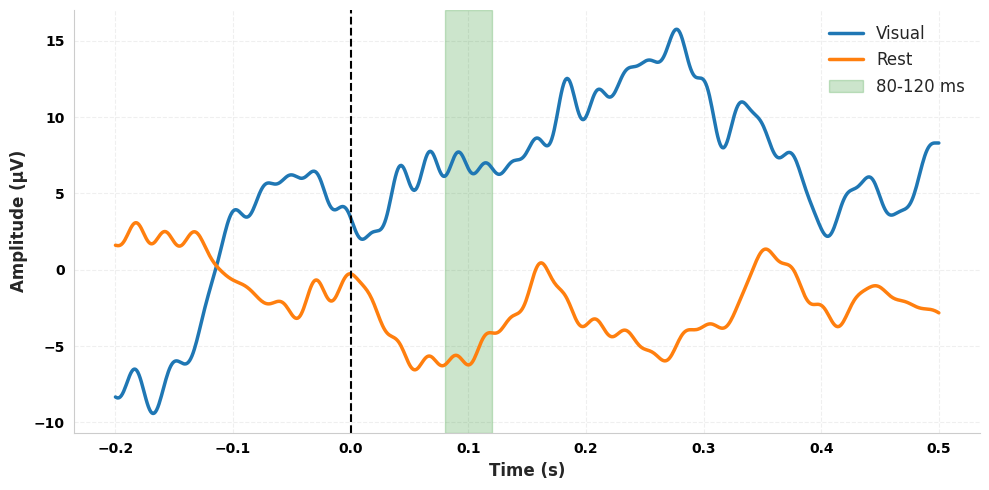

In [10]:
import numpy as np
from matplotlib import pyplot as plt

# Convert from volts to microvolts
mean_visual_uv = mean_visual * 1e6
mean_rest_uv = mean_rest * 1e6

# Define time axis
n_timepoints = len(mean_visual_uv)
time = np.linspace(-0.2, 0.5, n_timepoints)

plt.figure(figsize=(10, 5))

# Plotting with stylish colors
plt.plot(time, mean_visual_uv, label='Visual', color='#1f77b4', linewidth=2.5)
plt.plot(time, mean_rest_uv, label='Rest', color='#ff7f0e', linewidth=2.5)

# Vertical line at 0
plt.axvline(0, color='k', linestyle='--', linewidth=1.5)

# Highlight 80-120 ms
plt.axvspan(0.08, 0.12, color='green', alpha=0.2, label='80-120 ms')

# Labels and title
plt.xlabel('Time (s)', fontsize=12, fontweight='bold')
plt.ylabel('Amplitude (µV)', fontsize=12, fontweight='bold')

# Grid
plt.grid(alpha=0.3, linestyle='--')

# Customize ticks
plt.xticks(np.arange(-0.2, 0.6, 0.1), fontsize=10, fontweight='bold', color='black')
plt.yticks(fontsize=10, fontweight='bold', color='black')

# Remove top and right spines
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Legend
plt.legend(frameon=False, fontsize=12)

plt.tight_layout()
plt.show()
